# MVP: *Machine Learning & Analytics*

**Autor:** _Mauro Athayde Campos Nascimento_  

**Data:** 28/09/2025

**Dataset:** Suicide Rates Overview 1985 to 2016
(https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016)

---



# 1. Escopo, objetivo e defini√ß√£o do problema

O suic√≠dio √© reconhecido como um grave problema de sa√∫de p√∫blica, com impactos sociais e econ√¥micos significativos. A literatura aponta que fatores como sexo, idade, condi√ß√£o econ√¥mica e diferen√ßas regionais influenciam diretamente as taxas de suic√≠dio, mas h√° diverg√™ncias sobre o peso relativo de cada um desses determinantes.

**Nesse contexto, este trabalho busca responder √† seguinte quest√£o central: quais fatores explicam mais a taxa de suic√≠dios por 100 mil habitantes ‚Äî idade, sexo, condi√ß√£o econ√¥mica (PIB per capita) ou regi√£o do mundo?**

O objetivo do MVP √© aplicar t√©cnicas de aprendizado de m√°quina supervisionado, utilizando modelos de regress√£o em dados tabulares, para estimar a taxa de suic√≠dios e, sobretudo, avaliar a import√¢ncia relativa desses fatores. A an√°lise √© conduzida em duas etapas complementares:

Global: avaliando todos os pa√≠ses da base, de modo a identificar o padr√£o mundial.

Nacional: repetindo o procedimento apenas para o Brasil e comparando-o com Jap√£o e R√∫ssia, pa√≠ses de relev√¢ncia hist√≥rica no tema, para verificar se o Brasil segue ou se afasta das tend√™ncias globais.

## 1.1 Hip√≥teses centrais do estudo:

#### 1.1.1 - Fatores demogr√°ficos ‚Äî especialmente sexo masculino e faixas et√°rias mais avan√ßadas ‚Äî apresentam maior poder explicativo sobre as taxas de suic√≠dio do que vari√°veis econ√¥micas.

#### 1.1.2 - O Brasil tende a seguir o padr√£o global, ainda que em n√≠veis absolutos mais baixos.

## 1.2 Dataset utilizado

**O dataset cont√©m 27.820 observa√ß√µes, cobrindo o per√≠odo de 1985 a 2016 em 101 pa√≠ses. A base foi originalmente disponibilizada no Kaggle (https://www.kaggle.com/datasets/UCImachinelearning/suicide-rates-overview-1985-to-2016
), e cada linha corresponde a um grupo definido por pa√≠s, ano, sexo e faixa et√°ria. A escolha desse dataset se justifica pela completude das informa√ß√µes demogr√°ficas e econ√¥micas e pela relev√¢ncia social do tema.**

O estudo reconhece limita√ß√µes, como poss√≠veis diferen√ßas metodol√≥gicas na coleta entre pa√≠ses e o risco de interpreta√ß√µes indevidas em n√≠vel individual. Ainda assim, a an√°lise em n√≠vel agregado permite extrair padr√µes relevantes para pol√≠ticas p√∫blicas e para a compreens√£o dos determinantes do suic√≠dio em escala global e nacional.

## 1.3 Valor e aplica√ß√£o pr√°tica

O valor deste trabalho est√° em oferecer evid√™ncias quantitativas que auxiliem tanto a comunidade cient√≠fica quanto gestores p√∫blicos e formuladores de pol√≠ticas de sa√∫de na prioriza√ß√£o de recursos. Ao identificar os fatores mais relevantes na explica√ß√£o das taxas de suic√≠dio, o estudo pode apoiar estrat√©gias de preven√ß√£o direcionadas a grupos mais vulner√°veis, al√©m de fornecer subs√≠dios para compara√ß√µes entre o Brasil e o padr√£o global.

Do ponto de vista metodol√≥gico, a entrega adota um pipeline reproduz√≠vel em ambiente aberto (Google Colab), o que agrega valor educacional e garante que a an√°lise possa ser replicada, auditada ou atualizada com novos dados.

## 2. Reprodutibilidade e ambiente

- **Ambiente de execu√ß√£o:** Google Colab (Python 3.10).  
- **Bibliotecas principais utilizadas:**  
  - `pandas`, `numpy`: manipula√ß√£o e an√°lise de dados tabulares  
  - `matplotlib`: visualiza√ß√£o de dados  
  - `scikit-learn`: pr√©-processamento (OneHotEncoder, StandardScaler, SimpleImputer, ColumnTransformer), modelagem e m√©tricas de avalia√ß√£o

Para garantir reprodutibilidade, definimos seeds fixas. Isso significa que, mesmo em algoritmos que envolvem aleatoriedade (como a divis√£o treino/teste ou modelos de aprendizado baseados em amostragem), os resultados se manter√£o consistentes a cada execu√ß√£o.


In [1]:
# Setup de reprodutibilidade e bibliotecas
import os, random, sys, math, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Defini√ß√£o de seed fixa para reprodutibilidade
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

print("‚úÖ Ambiente configurado com seed fixa =", SEED)



‚úÖ Ambiente configurado com seed fixa = 42



# 3. Dados: carga, entendimento e qualidade

**Antes da modelagem, realizamos uma explora√ß√£o preliminar para entender a estrutura, a qualidade e a distribui√ß√£o dos dados.**

O dataset utilizado √© p√∫blico, originalmente dispon√≠vel no Kaggle, e foi hospedado no GitHub para permitir reprodutibilidade no Google Colab. Ele cont√©m 27.820 observa√ß√µes, cobrindo o per√≠odo de 1985 a 2016 em 101 pa√≠ses. Cada linha corresponde a um grupo definido por pa√≠s, ano, sexo e faixa et√°ria, contendo tamb√©m informa√ß√µes demogr√°ficas e econ√¥micas.

## 3.1 Dicion√°rio resumido de vari√°veis principais:

`country`: pa√≠s da observa√ß√£o.

`year`: ano da observa√ß√£o.

`sex`: sexo (male/female).

`age`: faixa et√°ria (5‚Äì14, 15‚Äì24, ‚Ä¶, 75+).

`suicides_no`: n√∫mero absoluto de suic√≠dios.

`population`: popula√ß√£o correspondente ao grupo.

`suicides/100k pop`: taxa de suic√≠dios padronizada por 100 mil habitantes.

`HDI for year`: √≠ndice de desenvolvimento humano (quando dispon√≠vel).

`gdp_for_year ($)`: PIB total do pa√≠s no ano (valores nominais).

`gdp_per_capita ($)`: PIB per capita.

`generation`: classifica√ß√£o geracional (GI Generation, Silent, Boomers, etc.).

`country-year`: identificador auxiliar, criado pela jun√ß√£o de pa√≠s e ano; usado apenas como chave t√©cnica para diferenciar registros, n√£o empregado nos modelos preditivos.

Nas etapas abaixo, foram realizadas:

- Corre√ß√µes de tipagem (num√©ricas e categ√≥ricas).

- Tratamento de colunas num√©ricas (remo√ß√£o de s√≠mbolos, pontos e espa√ßos).

- Verifica√ß√£o de valores ausentes (identifica√ß√£o de vari√°veis com gaps, como o HDI).

- Estat√≠sticas descritivas (m√©dia, desvio-padr√£o, mediana, m√≠nimo e m√°ximo).

**Importante**: nesta fase n√£o h√° risco de vazamento de dados, pois as an√°lises s√£o apenas explorat√≥rias. Essa explora√ß√£o serve para identificar padr√µes iniciais e limita√ß√µes que podem impactar as decis√µes de pipeline.


In [2]:
# =================== Setup Global ===================
import pandas as pd
import numpy as np

# Configura√ß√£o global: separador de milhar = ',', decimal = '.'
pd.options.display.float_format = lambda x: f"{x:,.2f}"

# Fun√ß√£o auxiliar para converter n√∫meros sem destruir decimais
def to_number(series, as_int=False):
    s = (series.astype(str)
                .str.strip()                           # remove espa√ßos extras
                .str.replace(r"[^0-9\.,]", "", regex=True))  # mant√©m n√∫meros, v√≠rgula e ponto

    # remove separador de milhar (,) e garante decimal ponto (.)
    s = s.str.replace(",", "")

    out = pd.to_numeric(s, errors="coerce")

    if as_int:
        return out.round().astype("Int64")
    return out

# =================== Importa ===================
url = "https://raw.githubusercontent.com/maurinhopa/MVPSuicideRate/refs/heads/main/Suicidal_Rates_1986-2016_New"
df = pd.read_csv(url, sep=";")

# =================== Limpeza / Tipagem ===================
# Converte colunas num√©ricas
df["suicides_no"]        = to_number(df["suicides_no"], as_int=True)
df["population"]         = to_number(df["population"], as_int=True)
df["suicides/100k pop"]  = to_number(df["suicides/100k pop"])
df["HDI for year"]       = to_number(df["HDI for year"])
df["gdp_for_year ($)"]   = to_number(df["gdp_for_year ($)"])
df["gdp_per_capita ($)"] = to_number(df["gdp_per_capita ($)"])

# Ajusta colunas categ√≥ricas
for c in ["country", "sex", "age", "country-year", "generation", "year"]:
    df[c] = df[c].astype("category")



## 3.2 Primeiras 10 linhas da base de dados
As primeiras linhas confirmam a estrutura da base, trazendo pa√≠s, ano, sexo, faixa et√°ria, suic√≠dios absolutos, popula√ß√£o, taxa padronizada, vari√°veis econ√¥micas e gera√ß√£o, sem inconsist√™ncias aparentes.

In [3]:
display(df.head(10))


country  year     sex          age  suicides_no  population  \
0  Albania  1987  female  15-24 years           14      289700   
1  Albania  1987  female  25-34 years            4      257200   
2  Albania  1987  female  35-54 years            6      278800   
3  Albania  1987  female   5-14 years            0      311000   
4  Albania  1987  female  55-74 years            0      144600   
5  Albania  1987  female    75+ years            1       35600   
6  Albania  1987    male  15-24 years           21      312900   
7  Albania  1987    male  25-34 years            9      274300   
8  Albania  1987    male  35-54 years           16      308000   
9  Albania  1987    male   5-14 years            0      338200   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)  \
0               4.83  Albania1987           NaN        2156624900   
1               1.56  Albania1987           NaN        2156624900   
2               2.15  Albania1987           NaN        2156624900   
3               0.00  Albania1987           NaN        2156624900   
4               0.00  Albania1987           NaN        2156624900   
5               2.81  Albania1987           NaN        2156624900   
6               6.71  Albania1987           NaN        2156624900   
7               3.28  Albania1987           NaN        2156624900   
8               5.19  Albania1987           NaN        2156624900   
9               0.00  Albania1987           NaN        2156624900   

   gdp_per_capita ($)       generation  
0              796.00     Generation X  
1              796.00          Boomers  
2              796.00           Silent  
3              796.00     Generation X  
4              796.00  G.I. Generation  
5              796.00  G.I. Generation  
6              796.00     Generation X  
7              796.00          Boomers  
8              796.00           Silent  
9              796.00     Generation X

## 3.3 N√∫mero de inst√¢ncias e atributos
A base possui 27.820 registros e 12 atributos, cobrindo 31 anos em 101 pa√≠ses, o que garante volume adequado de dados para an√°lise.

In [4]:
display(pd.DataFrame(
    {"Valor": [df.shape[0], df.shape[1]]},
    index=["N√∫mero de inst√¢ncias", "N√∫mero de atributos"]
))


Valor
N√∫mero de inst√¢ncias  27820
N√∫mero de atributos      12

## 3.4 Tipos de dados
As vari√°veis foram convertidas corretamente: num√©ricas em formatos inteiros ou decimais e categ√≥ricas, assegurando compatibilidade com os pipelines de modelagem.

In [5]:
display(df.dtypes.astype(str).rename("dtype").to_frame())


dtype
country             category
year                category
sex                 category
age                 category
suicides_no            Int64
population             Int64
suicides/100k pop    float64
country-year        category
HDI for year         float64
gdp_for_year ($)       int64
gdp_per_capita ($)   float64
generation          category

## 3.5 Valores ausentes por coluna
A √∫nica vari√°vel com grande volume de nulos √© o HDI for year (19.456 registros, cerca de 70%), enquanto todas as demais colunas est√£o completas.

In [6]:
display(df.isna().sum().sort_values(ascending=False).rename("nulos").to_frame())


nulos
HDI for year        19456
country                 0
sex                     0
year                    0
age                     0
suicides_no             0
suicides/100k pop       0
population              0
country-year            0
gdp_for_year ($)        0
gdp_per_capita ($)      0
generation              0

## 3.6 Resumo estat√≠stico (num√©ricos)
O resumo estat√≠stico **mostra a forte heterogeneidade da base**. Os suic√≠dios variam de **0 a mais de 22 mil casos por grupo**, enquanto a popula√ß√£o dos recortes vai de apenas **278 habitantes a mais de 43 milh√µes**, o que gera taxas extremas como o m√°ximo de 224,97/100k (casos em popula√ß√µes muito pequenas, que n√£o comporta bem a m√©trica de 100 mil por caso). A mediana da taxa √© de 6/100k, mas a m√©dia sobe para 12,8/100k devido a poucos valores muito altos, confirmando uma distribui√ß√£o assim√©trica com cauda longa. **J√° o PIB per capita varia de menos de USD 300 at√© mais de USD 126 mil**, refor√ßando a grande diversidade socioecon√¥mica. Em s√≠ntese, a base re√∫ne popula√ß√µes d√≠spares, taxas desiguais e forte varia√ß√£o econ√¥mica, fatores que exigem cuidado com outliers, mas tamb√©m **ampliam o potencial anal√≠tico do estudo**.

In [7]:
desc = df.select_dtypes("number").describe().T
desc["mean"] = desc["mean"].map(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
desc["std"] = desc["std"].map(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
display(desc)


count                mean                   std  \
suicides_no        27,820.00              242,57                902,05   
population         27,820.00        1.844.793,62          3.911.779,44   
suicides/100k pop  27,820.00               12,82                 18,96   
HDI for year        8,364.00                0,78                  0,09   
gdp_for_year ($)   27,820.00  445.580.969.025,73  1.453.609.985.940,92   
gdp_per_capita ($) 27,820.00           16.866,46             18.887,58   

                             min              25%               50%  \
suicides_no                 0.00             3.00             25.00   
population                278.00        97,498.50        430,150.00   
suicides/100k pop           0.00             0.92              5.99   
HDI for year                0.48             0.71              0.78   
gdp_for_year ($)   46,919,625.00 8,985,352,832.00 48,114,688,201.00   
gdp_per_capita ($)        251.00         3,447.00          9,372.00   

                                  75%                   max  
suicides_no                    131.00             22,338.00  
population               1,486,143.25         43,805,214.00  
suicides/100k pop               16.62                224.97  
HDI for year                     0.85                  0.94  
gdp_for_year ($)   260,202,429,150.00 18,120,714,000,000.00  
gdp_per_capita ($)          24,874.00            126,352.00

## 3.7 Medianas (num√©ricos)
As medianas refor√ßam o padr√£o de grupos relativamente pequenos (‚âà430 mil habitantes), PIB per capita mediano de 9.372 USD e HDI em torno de 0,78, valores representativos do conjunto global.

In [8]:
med = df.select_dtypes("number").median().round(2).to_frame("mediana")
med["mediana"] = med["mediana"].map(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
display(med)

mediana
suicides_no                     25,00
population                 430.150,00
suicides/100k pop                5,99
HDI for year                     0,78
gdp_for_year ($)    48.114.688.201,00
gdp_per_capita ($)           9.372,00

# Etapa 4 ‚Äî EDA (Exploratory Data Analysis)

A an√°lise explorat√≥ria busca entender o comportamento da base antes da modelagem, por meio de estat√≠sticas descritivas e visualiza√ß√µes. Nesta etapa investigamos distribui√ß√µes, correla√ß√µes, compara√ß√µes entre grupos e outliers, de forma a identificar padr√µes relevantes sobre os fatores associados √†s taxas de suic√≠dio.

## 4.1 Evolu√ß√£o da Taxa Global de Suic√≠dio - 1985 - 2016 (Por 100 mil habitantes)

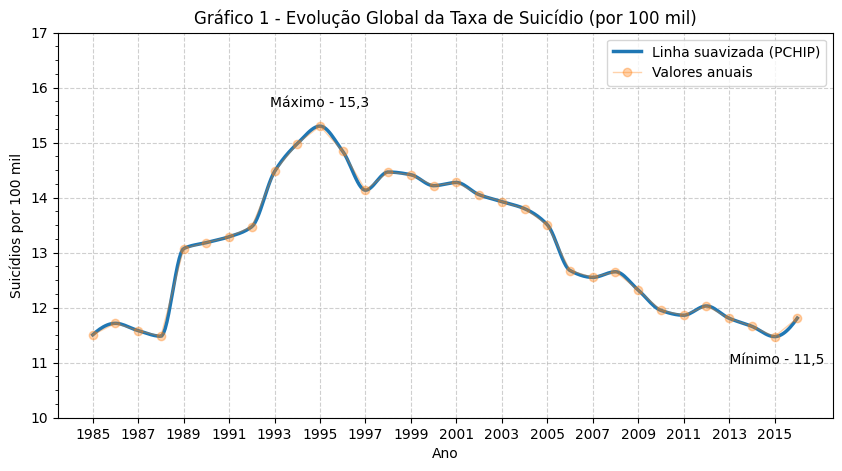

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import PchipInterpolator  # spline que preserva a forma (sem overshoot)

# Se "ts" n√£o existir, recalcula a s√©rie agregada correta (‚àësuicides / ‚àëpop √ó 100k)
if "ts" not in locals():
    df_ok = df.dropna(subset=["suicides_no","population"]).copy()
    df_ok["year_int"] = df_ok["year"].astype(int)
    ts = (
        df_ok.groupby("year_int", as_index=False)
             .agg(suicides_no=("suicides_no","sum"),
                  population=("population","sum"))
             .assign(rate_100k=lambda d: (d["suicides_no"]/d["population"]) * 100000)
             .sort_values("year_int")
    )

# ------- linha suavizada sem m√©dia m√≥vel -------
x = ts["year_int"].to_numpy()
y = ts["rate_100k"].to_numpy()

# spline PCHIP (passa pelos pontos, sem ‚Äúondas‚Äù artificiais)
pchip = PchipInterpolator(x, y)
x_smooth = np.linspace(x.min(), x.max(), 400)
y_smooth = pchip(x_smooth)

# ------- escala (bandas) mais justa -------
pad = (y.max() - y.min()) * 0.06   # ~6% de folga

plt.figure(figsize=(10,5))
plt.plot(x_smooth, y_smooth, linewidth=2.5, label="Linha suavizada (PCHIP)")
plt.plot(x, y, marker="o", linewidth=1, alpha=0.35, label="Valores anuais")  # opcional: pontos reais

plt.title("Gr√°fico 1 - Evolu√ß√£o Global da Taxa de Suic√≠dio (por 100 mil)")
plt.xlabel("Ano")
plt.ylabel("Suic√≠dios por 100 mil")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

ax = plt.gca()
ax.set_ylim(y.min() - pad, y.max() + pad)   # ‚Äúbandas‚Äù mais pr√≥ximas do dado
ax.xaxis.set_ticks(np.arange(x.min(), x.max()+1, 2))  # ticks a cada 2 anos
ax.yaxis.set_major_locator(MultipleLocator(0.5))      # passo de 0,5
ax.yaxis.set_minor_locator(MultipleLocator(0.5))     # grade fina

from matplotlib.ticker import MultipleLocator

ax = plt.gca()
ax.set_ylim(10, 17)                      # fixa a escala do eixo Y entre 10 e 17
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

# anota√ß√µes: pico e m√≠nimo (s√≥ o n√∫mero, sem seta)
peak_i = np.argmax(y)
min_i  = np.argmin(y)

# offsets verticais (ajuste se quiser)
off_up = 0.30
off_dn = 0.30

ax.text(x[peak_i], y[peak_i] + off_up,
        f"M√°ximo - {y[peak_i]:.1f}".replace(".", ","),  # v√≠rgula decimal
        ha="center", va="bottom", fontsize=10)

ax.text(x[min_i], y[min_i] - off_dn,
        f" M√≠nimo - {y[min_i]:.1f}".replace(".", ","),  # v√≠rgula decimal
        ha="center", va="top", fontsize=10)


plt.show()




**An√°lise do Gr√°fico: Evolu√ß√£o Global da Taxa de Suic√≠dio (1985‚Äì2016)**
Entre 1986 e 2016, a taxa global por 100 mil habitantes descreve uma √∫nica onda: sobe do fim dos anos 1980 at√© atingir o pico em 1995; depois entra em queda cont√≠nua at√© o in√≠cio dos anos 2010 e, a partir da√≠, mant√©m-se est√°vel em patamar mais baixo at√© o final da s√©rie.

Com o eixo fixado entre 10 e 17, a varia√ß√£o aparece como moderada, sem saltos abruptos. A linha suavizada apenas melhora a leitura visual, sem alterar os valores anuais.

- **Pico**: meados dos anos 1990 ‚Äî ponto mais alto da s√©rie (15,3 por 100 mil).

- **M√≠nimo**: in√≠cio dos anos 2010 ‚Äî ponto mais baixo (11,5 por 100 mil).

- **Amplitude**: diferen√ßa de alguns pontos por 100 mil entre pico e m√≠nimo, sem rupturas bruscas.

- **Encerramento**: o final do per√≠odo permanece abaixo do pico, sem revers√£o clara da tend√™ncia.



No intuito de aprofundar a an√°lise e entender quais grupos de pa√≠ses mais contribu√≠ram para essa varia√ß√£o, a pr√≥xima etapa ser√° complementar a vis√£o global com compara√ß√µes espec√≠ficas entre sexos, idades e regi√µes.

### 4.1.1 Evolu√ß√£o da Taxa Global de Suic√≠dio - 1985 - 2016 (Por 100 mil habitantes) por Regi√£o

Total pa√≠ses na base: 101
Total pa√≠ses mapeados: 101
Diferen√ßa: set()


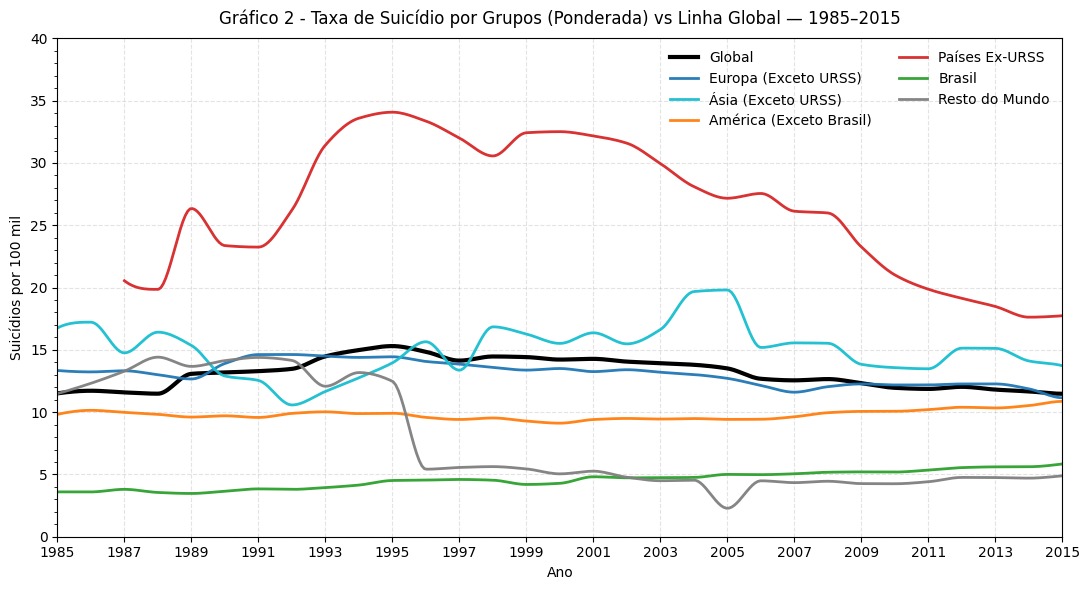

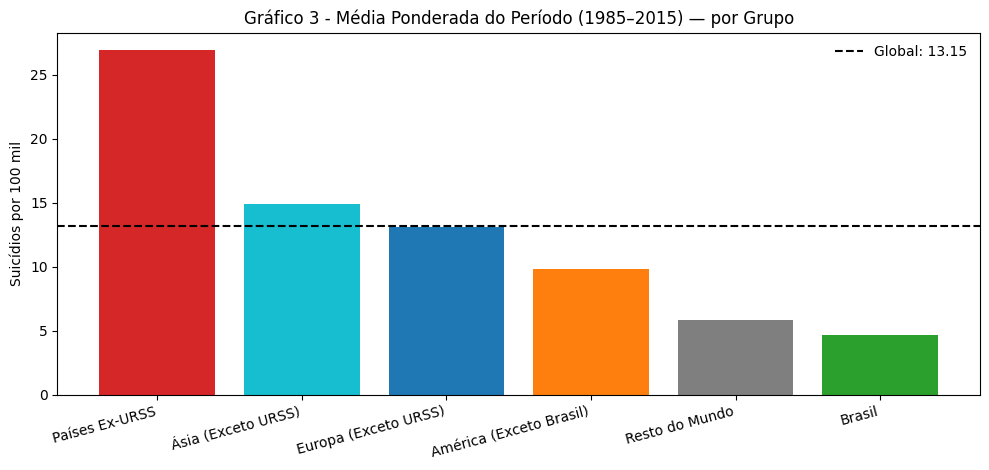

In [10]:
# ======================
# CLASSIFICA√á√ÉO + GR√ÅFICOS
# ======================

from scipy.interpolate import PchipInterpolator
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np

# --- 1) Grupos fixos (101 pa√≠ses)
ex_urss = [
    "Armenia","Azerbaijan","Belarus","Estonia","Georgia","Kazakhstan",
    "Kyrgyzstan","Latvia","Lithuania","Russian Federation","Turkmenistan",
    "Ukraine","Uzbekistan"
]

asia_exc_urss = [
    "Japan","Mongolia","Philippines","Republic of Korea","Singapore",
    "Sri Lanka","Thailand","Turkey","Israel","Maldives","Oman"
]

europa_exc_urss = [
    "Albania","Austria","Belgium","Bosnia and Herzegovina","Bulgaria",
    "Croatia","Cyprus","Czech Republic","Denmark","Finland","France",
    "Germany","Greece","Hungary","Iceland","Ireland","Italy",
    "Luxembourg","Malta","Montenegro","Netherlands","Norway","Poland",
    "Portugal","Romania","San Marino","Serbia","Slovakia","Slovenia",
    "Spain","Sweden","Switzerland","United Kingdom"
]

america_exc_brasil = [
    "Antigua and Barbuda","Argentina","Aruba","Bahamas","Barbados",
    "Belize","Canada","Chile","Colombia","Costa Rica","Cuba","Dominica",
    "Ecuador","El Salvador","Grenada","Guatemala","Jamaica","Mexico",
    "Nicaragua","Panama","Paraguay","Puerto Rico","Saint Kitts and Nevis",
    "Saint Lucia","Saint Vincent and Grenadines","Suriname",
    "Trinidad and Tobago","United States","Uruguay","Guyana"
]

brasil = ["Brazil"]

resto_do_mundo = [
    "Australia","Bahrain","Cabo Verde","Fiji","Kiribati","Kuwait",
    "Macau","Mauritius","New Zealand","Qatar","Seychelles",
    "South Africa","United Arab Emirates"
]

# --- 2) Classifica√ß√£o
def classify_region(country):
    if country in ex_urss:
        return "Pa√≠ses Ex-URSS"
    elif country in asia_exc_urss:
        return "√Åsia (Exceto URSS)"
    elif country in europa_exc_urss:
        return "Europa (Exceto URSS)"
    elif country in america_exc_brasil:
        return "Am√©rica (Exceto Brasil)"
    elif country in brasil:
        return "Brasil"
    elif country in resto_do_mundo:
        return "Resto do Mundo"
    else:
        return "ERRO ‚Äî pa√≠s n√£o mapeado!"

df_ok["region"] = df_ok["country"].apply(classify_region)

# --- 3) Checagem
todos = set(df_ok["country"].unique())
mapeados = set(ex_urss + asia_exc_urss + europa_exc_urss + america_exc_brasil + brasil + resto_do_mundo)
print("Total pa√≠ses na base:", len(todos))
print("Total pa√≠ses mapeados:", len(mapeados))
print("Diferen√ßa:", todos - mapeados)

# --- 4) S√©ries temporais
reg_ts = (
    df_ok.groupby(["region","year_int"], as_index=False)
         .agg(suicides_no=("suicides_no","sum"),
              population=("population","sum"))
         .assign(rate_100k=lambda d: d["suicides_no"]/d["population"]*100000)
)

ts_global = (
    df_ok.groupby("year_int", as_index=False)
         .agg(suicides_no=("suicides_no","sum"),
              population=("population","sum"))
         .assign(rate_100k=lambda d: d["suicides_no"]/d["population"]*100000)
)

# --- 5) Fun√ß√£o suavizadora
def smooth_xy(x, y, n=400):
    p = PchipInterpolator(x, y)
    xs = np.linspace(x.min(), x.max(), n)
    ys = p(xs)
    return xs, ys

# --- 6) Ordem + cores
order = [
    "Europa (Exceto URSS)",
    "√Åsia (Exceto URSS)",
    "Am√©rica (Exceto Brasil)",
    "Pa√≠ses Ex-URSS",
    "Brasil",
    "Resto do Mundo",
]

palette = {
    "Europa (Exceto URSS)":     "#1f77b4",
    "√Åsia (Exceto URSS)":       "#17becf",
    "Am√©rica (Exceto Brasil)":  "#ff7f0e",
    "Pa√≠ses Ex-URSS":           "#d62728",
    "Brasil":                   "#2ca02c",
    "Resto do Mundo":           "#7f7f7f",
}

# --- 7) Gr√°fico 1: evolu√ß√£o temporal
fig, ax = plt.subplots(figsize=(11,6))

# Global
xg = ts_global["year_int"].to_numpy()
yg = ts_global["rate_100k"].to_numpy()
xg_s, yg_s = smooth_xy(xg, yg, n=500)
ax.plot(xg_s, yg_s, color="black", linewidth=3, label="Global")

# Regi√µes
for region in order:
    s = reg_ts[reg_ts["region"] == region]
    if s.empty or s["year_int"].nunique() < 2:
        continue
    xr = s["year_int"].to_numpy()
    yr = s["rate_100k"].to_numpy()
    xs, ys = smooth_xy(xr, yr, n=400)
    ax.plot(xs, ys, linewidth=2, alpha=0.95, color=palette[region], label=region)

ax.set_title("Gr√°fico 2 - Taxa de Suic√≠dio por Grupos (Ponderada) vs Linha Global ‚Äî 1985‚Äì2015", pad=10)
ax.set_xlabel("Ano")
ax.set_ylabel("Suic√≠dios por 100 mil")
ax.set_xlim(1985, 2015)
ax.set_ylim(0, 40)
ax.xaxis.set_ticks(np.arange(1985, 2016, 2))
ax.yaxis.set_major_locator(MultipleLocator(5.0))
ax.yaxis.set_minor_locator(MultipleLocator(1.0))
ax.grid(True, linestyle="--", alpha=0.35)
ax.legend(ncol=2, frameon=False)
fig.tight_layout()
plt.show()

# --- 8) Gr√°fico 2: m√©dias do per√≠odo
means = (
    df_ok.groupby("region", as_index=False)
         .agg(suicides_no=("suicides_no","sum"), population=("population","sum"))
         .assign(rate_mean_100k=lambda d: (d["suicides_no"]/d["population"])*100000)
)

means_plot = (
    means.set_index("region")
         .reindex(order)
         .reset_index()[["region","rate_mean_100k"]]
)

global_mean_rate = float((df_ok["suicides_no"].sum() / df_ok["population"].sum()) * 100000)

# --- Ordena pelo valor da m√©dia (decrescente)
means_plot_sorted = means_plot.sort_values(by="rate_mean_100k", ascending=False)

plt.figure(figsize=(10,4.8))
colors = [palette[r] for r in means_plot_sorted["region"]]
plt.bar(means_plot_sorted["region"], means_plot_sorted["rate_mean_100k"], color=colors)
plt.axhline(global_mean_rate, linestyle="--", linewidth=1.5, color="black",
            label=f"Global: {global_mean_rate:.2f}")
plt.title("Gr√°fico 3 - M√©dia Ponderada do Per√≠odo (1985‚Äì2015) ‚Äî por Grupo")
plt.ylabel("Suic√≠dios por 100 mil")
plt.xticks(rotation=15, ha="right")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

# --- 9) Limpa se n√£o for mais usar
df_ok = df_ok.drop(columns=["region"])


**An√°lise sobre a evolu√ß√£o temporal por grupo**

Entre 1985 e 2015, a linha global (preta) descreve uma trajet√≥ria em ‚Äúonda‚Äù: subida at√© meados dos anos 1990 (aprox. 15/100k), seguida de queda cont√≠nua at√© o in√≠cio dos anos 2010 (aprox. 11‚Äì12/100k), estabilizando depois disso.

**Os grupos se posicionam da seguinte forma:**

**Pa√≠ses Ex-URSS (vermelho)**
N√≠vel disparado acima dos demais. Pico superior a 30/100k na d√©cada de 1990, relacionado ao colapso pol√≠tico e socioecon√¥mico p√≥s-sovi√©tico. Depois, decl√≠nio gradual, mas ainda encerrando acima da m√©dia global (~20/100k). Principal respons√°vel por puxar o topo global dos anos 90.

**√Åsia (Exceto URSS) (ciano)**
Oscila em torno da linha global, com picos pontuais nos anos 2000 (~20/100k). Termina o per√≠odo pr√≥ximo a 13‚Äì14/100k, levemente acima da m√©dia global.

**Europa (Exceto URSS) (azul)**
Trajet√≥ria mais est√°vel. Permanece entre 12‚Äì14/100k durante quase todo o per√≠odo, com leve decl√≠nio ap√≥s 2000. Fica pr√≥xima, mas ligeiramente abaixo da global no final.

**Am√©rica (Exceto Brasil) (laranja)**
Sempre abaixo da global, variando em torno de 9‚Äì11/100k. Leve tend√™ncia de alta no fim do per√≠odo.

**Brasil (verde)**
N√≠vel consistentemente mais baixo do painel (~3‚Äì6/100k), com leve tend√™ncia de alta ap√≥s 2000. √â o grupo que mais reduz o n√≠vel agregado.

**Resto do Mundo (cinza)**
Posi√ß√£o intermedi√°ria: come√ßa pr√≥ximo da global no fim dos anos 80/in√≠cio dos 90, mas segue trajet√≥ria de queda, terminando entre 5‚Äì6/100k. Apesar da heterogeneidade, o grupo refor√ßa o padr√£o de redu√ß√£o.

De forma an√°loga, o gr√°fico 4.3 refor√ßa as diferen√ßas estruturais entre os grupos:

**Pa√≠ses Ex-URSS (~27/100k)** ‚Äî valor mais alto, mais que o dobro da m√©dia global (13,15).

**√Åsia (Exceto URSS) (~15/100k)** ‚Äî ligeiramente acima da global.

**Europa (Exceto URSS) (~13/100k)** ‚Äî alinhada √† global, orbitando pr√≥ximo √† m√©dia.

**Am√©rica (Exceto Brasil) (~10/100k)** ‚Äî abaixo da global, mas ainda com relev√¢ncia demogr√°fica.

**Resto do Mundo (~6/100k)** ‚Äî baixo, refor√ßa a tend√™ncia de queda.

**Brasil (~4‚Äì5/100k)** ‚Äî n√≠vel mais baixo de todos os grupos.

Dessa forma, a an√°lise das m√©dias ponderadas deixa claro que a trajet√≥ria global das taxas de suic√≠dio n√£o √© homog√™nea, mas fortemente influenciada por diferen√ßas regionais.

O formato da curva mundial foi ditado principalmente pelos pa√≠ses Ex-URSS, que apresentaram n√≠veis excepcionalmente altos ap√≥s o colapso sovi√©tico, elevando a m√©dia global nos anos 1990.

Europa e √Åsia orbitam em torno da linha global, mantendo relativa estabilidade e funcionando como for√ßas de equil√≠brio. Em contrapartida, Am√©rica (exceto Brasil) e o grupo Resto do Mundo contribu√≠ram para aliviar a m√©dia, situando-se de forma consistente abaixo da global, enquanto o Brasil se destacou como o grupo com os menores √≠ndices de todo o painel.

**Esse resultado refor√ßa o peso da regi√£o funcionando como proxy de fatores culturais, sociais e pol√≠ticos que moldam o comportamento suicida, quee se manifesta de forma evidente quando olhamos a decomposi√ß√£o regional do fen√¥meno.**

## 4.2 An√°lise Demogr√°fica: G√™nero e Faixa Et√°ria ‚Äî Global x Brasil
A seguir, aprofundamos a an√°lise considerando caracter√≠sticas demogr√°ficas fundamentais ‚Äî g√™nero e faixa et√°ria ‚Äî em um comparativo entre o cen√°rio global e o Brasil. Esses recortes permitem observar como fatores estruturais da popula√ß√£o influenciam as taxas de suic√≠dio, funcionando como vari√°veis-chave para compreender o fen√¥meno. Ao analisar g√™nero e idade, buscamos identificar padr√µes consistentes e diferen√ßas contextuais, que podem revelar tanto determinantes universais quanto especificidades do caso brasileiro.

/tmp/ipython-input-3625317195.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  suicidios_sexo_global = df.groupby("sex", as_index=False)["suicides_no"].sum()
/tmp/ipython-input-3625317195.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  suicidios_sexo_brasil = df_br.groupby("sex", as_index=False)["suicides_no"].sum()
/tmp/ipython-input-3625317195.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=suicidios_sexo_global, x="sex", y="suicides_no",
/

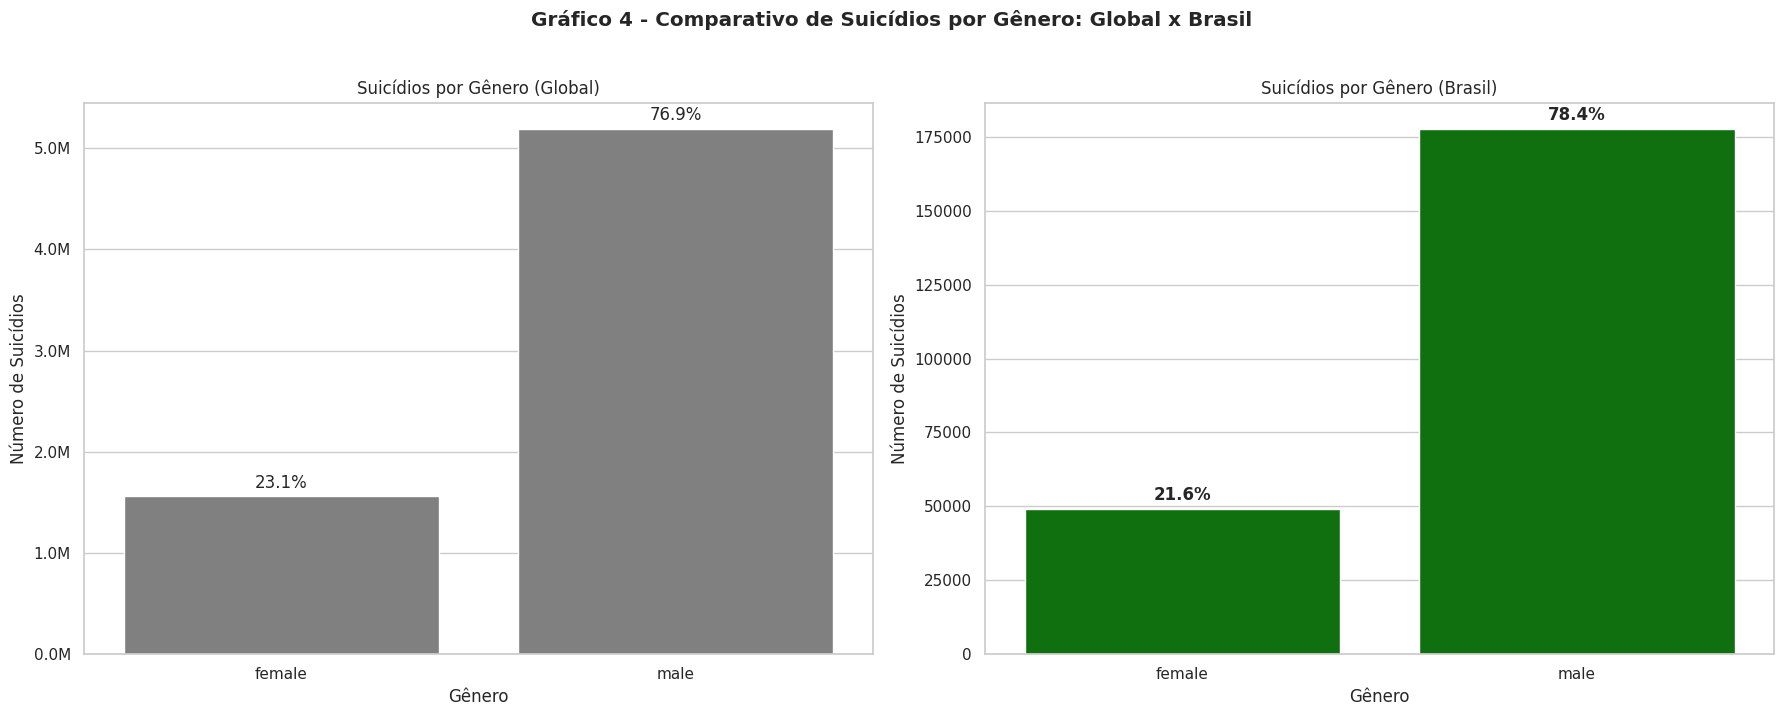

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configura√ß√µes iniciais para um visual melhor
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (16, 8)  # Tamanho maior para os dois gr√°ficos
plt.rcParams['font.size'] = 12

# Garante tipagem correta
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce")

# 1. Prepara os dados Globais
suicidios_sexo_global = df.groupby("sex", as_index=False)["suicides_no"].sum()
total_global = suicidios_sexo_global["suicides_no"].sum()

# 2. Prepara os dados do Brasil
df_br = df[df["country"] == "Brazil"].copy()
suicidios_sexo_brasil = df_br.groupby("sex", as_index=False)["suicides_no"].sum()
total_brasil = suicidios_sexo_brasil["suicides_no"].sum()

# Cria a figura e os dois subgr√°ficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(18, 7))

# Gr√°fico da esquerda: An√°lise Global
sns.barplot(data=suicidios_sexo_global, x="sex", y="suicides_no",
            palette=["grey", "grey"], ax=ax1)
ax1.set_title("Suic√≠dios por G√™nero (Global)")
ax1.set_xlabel("G√™nero", fontsize=12)
ax1.set_ylabel("N√∫mero de Suic√≠dios", fontsize=12)

# Ajusta a escala do eixo Y para milh√µes
ax1.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda y_tick, loc: f"{y_tick/1_000_000:.1f}M")
)

# Adiciona o percentual no gr√°fico Global
for p in ax1.patches:
    value = p.get_height()
    if total_global > 0 and not np.isnan(value):
        ax1.annotate(f"{(value / total_global) * 100:.1f}%",
                     (p.get_x() + p.get_width() / 2., value),
                     ha="center", va="center",
                     xytext=(0, 10),
                     textcoords="offset points", fontsize=12)

# Gr√°fico da direita: An√°lise Brasil
sns.barplot(data=suicidios_sexo_brasil, x="sex", y="suicides_no",
            palette=["green", "green"], ax=ax2)
ax2.set_title("Suic√≠dios por G√™nero (Brasil)")
ax2.set_xlabel("G√™nero", fontsize=12)
ax2.set_ylabel("N√∫mero de Suic√≠dios", fontsize=12)

# Adiciona o percentual no gr√°fico do Brasil
for p in ax2.patches:
    value = p.get_height()
    if total_brasil > 0 and not np.isnan(value):
        ax2.annotate(f"{(value / total_brasil) * 100:.1f}%",
                     (p.get_x() + p.get_width() / 2., value),
                     ha="center", va="center",
                     xytext=(0, 10),
                     textcoords="offset points", fontsize=12, fontweight="bold")

plt.suptitle("Gr√°fico 4 - Comparativo de Suic√≠dios por G√™nero: Global x Brasil",
             fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()


**An√°lise ‚Äî G√™nero (Global x Brasil)**

A an√°lise por g√™nero mostra que os **homens concentram a esmagadora maioria dos suic√≠dios**, tanto no mundo (76,9%) quanto no Brasil (78,4%). As mulheres, por sua vez, representam apenas cerca de um quinto dos casos. Essa consist√™ncia revela que a vari√°vel sexo √© um fator determinante, funcionando como proxy de quest√µes culturais e comportamentais. A literatura demonstra que homens tendem a procurar menos ajuda em sa√∫de mental e a serem mais impactados por press√µes socioecon√¥micas e de papel social. **A proximidade dos percentuais global e brasileiro refor√ßa que se trata de um padr√£o estrutural**, pouco influenciado por contexto regional.

/tmp/ipython-input-1411179702.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_geral = df.groupby("age", as_index=False)["suicides_no"].sum()
/tmp/ipython-input-1411179702.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_brasil_ordenado = df_brasil.groupby("age", as_index=False)["suicides_no"].sum()
/tmp/ipython-input-1411179702.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_geral_ordenado, x="age", y="suicides_no",
/tmp/ipython-inpu

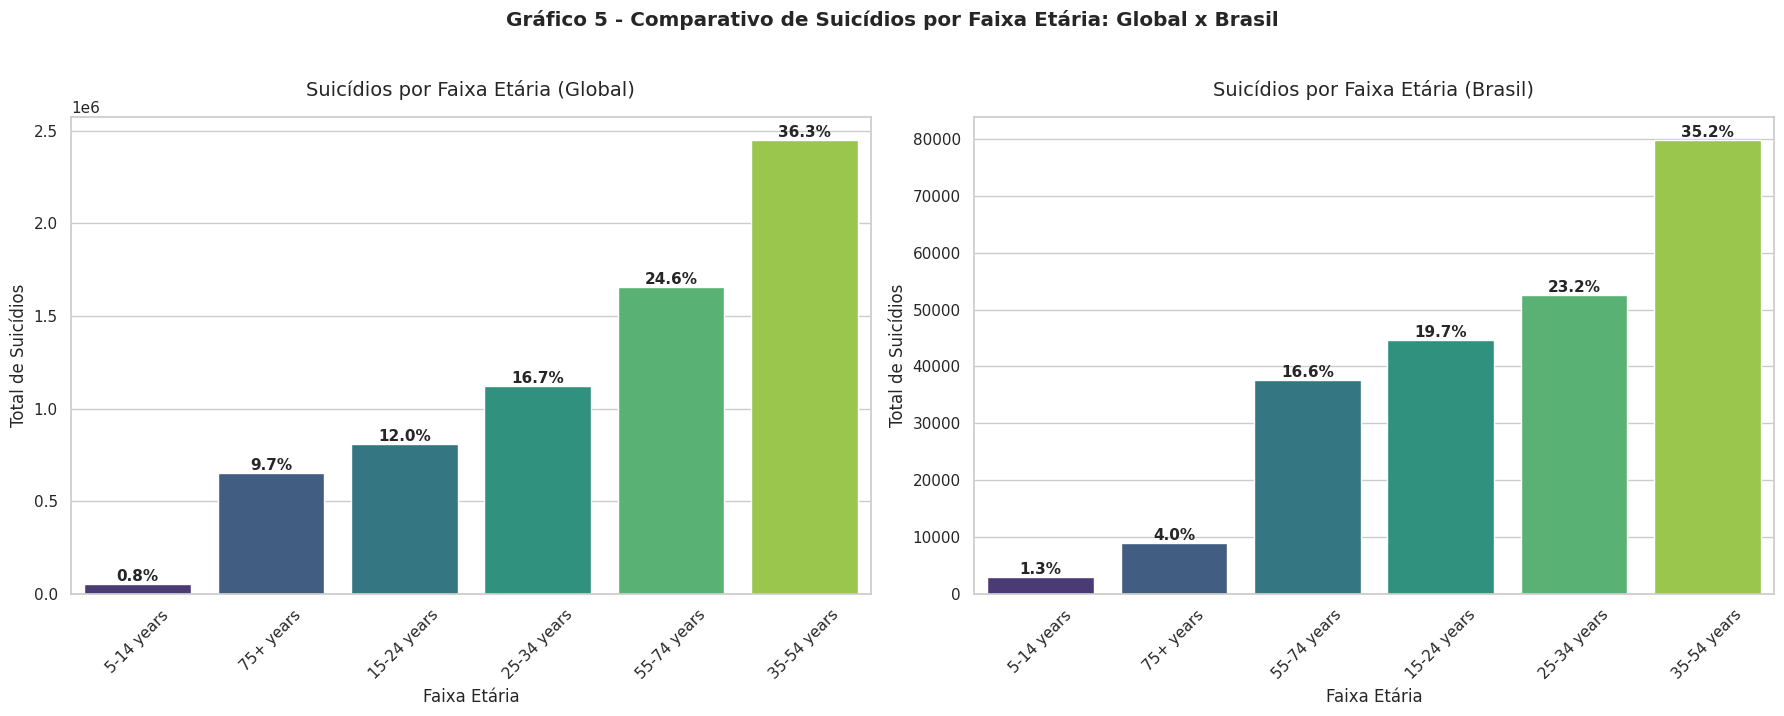

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- PREPARA√á√ÉO DOS DADOS ---
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce")

# Global
df_geral = df.groupby("age", as_index=False)["suicides_no"].sum()
df_geral_ordenado = df_geral.sort_values(by="suicides_no")
total_geral = df_geral_ordenado["suicides_no"].sum()

# Brasil
df_brasil = df[df["country"] == "Brazil"].copy()
df_brasil_ordenado = df_brasil.groupby("age", as_index=False)["suicides_no"].sum()
df_brasil_ordenado = df_brasil_ordenado.sort_values(by="suicides_no")
total_brasil = df_brasil_ordenado["suicides_no"].sum()

# --- CRIA√á√ÉO DOS GR√ÅFICOS LADO A LADO ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Gr√°fico Global
sns.barplot(data=df_geral_ordenado, x="age", y="suicides_no",
            palette="viridis", ax=ax1, order=df_geral_ordenado["age"])

# Adiciona os percentuais no gr√°fico Global
for p in ax1.patches:
    value = p.get_height()
    if total_geral > 0 and not np.isnan(value):
        percent = f"{(100 * value / total_geral):.1f}%"
        ax1.annotate(percent,
                     (p.get_x() + p.get_width() / 2, value),
                     ha="center", va="bottom",
                     fontsize=11, weight="bold")

ax1.set_title("Suic√≠dios por Faixa Et√°ria (Global)", fontsize=14, pad=15)
ax1.set_xlabel("Faixa Et√°ria")
ax1.set_ylabel("Total de Suic√≠dios")
ax1.tick_params(axis="x", rotation=45)

# Gr√°fico Brasil
sns.barplot(data=df_brasil_ordenado, x="age", y="suicides_no",
            palette="viridis", ax=ax2, order=df_brasil_ordenado["age"])

# Adiciona os percentuais no gr√°fico Brasil
for p in ax2.patches:
    value = p.get_height()
    if total_brasil > 0 and not np.isnan(value):
        percent = f"{(100 * value / total_brasil):.1f}%"
        ax2.annotate(percent,
                     (p.get_x() + p.get_width() / 2, value),
                     ha="center", va="bottom",
                     fontsize=11, weight="bold")

ax2.set_title("Suic√≠dios por Faixa Et√°ria (Brasil)", fontsize=14, pad=15)
ax2.set_xlabel("Faixa Et√°ria")
ax2.set_ylabel("Total de Suic√≠dios")
ax2.tick_params(axis="x", rotation=45)

plt.suptitle("Gr√°fico 5 - Comparativo de Suic√≠dios por Faixa Et√°ria: Global x Brasil",
             fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()


**An√°lise ‚Äî Faixa Et√°ria (Global x Brasil)**

Tanto no Brasil quanto globalmente, os **adultos de 35‚Äì54** anos e os **idosos de 55‚Äì74 anos** concentram a maior parte dos suic√≠dios, confirmando que o fen√¥meno se intensifica nas fases mais maduras da vida. As faixas mais jovens aparecem com participa√ß√£o menor, especialmente os **5‚Äì14 anos**, que ficam abaixo de 2% em ambos os cen√°rios. A diferen√ßa mais marcante est√° no grupo **75+ anos**, que tem peso significativo no mundo (9,7%), mas reduzido no Brasil (4,0%), refletindo fatores demogr√°ficos e contextuais, como uma popula√ß√£o brasileira mais jovem e menor expectativa de vida. Esses resultados refor√ßam que **a idade √© uma vari√°vel cr√≠tica** para explicar taxas de suic√≠dio, indicando a necessidade de priorizar pol√≠ticas de preven√ß√£o voltadas para as faixas adultas e maduras, onde o impacto social e econ√¥mico √© mais elevado.

## 4.3 Distribui√ß√£o da Taxa de Suic√≠dios (1985‚Äì2015)

Procedemos com a an√°lise da distribui√ß√£o de nossa vari√°vel algo, a qual apresenta um **forte vi√©s √† direita**, ou seja, a grande maioria dos casos concentra-se em n√≠veis baixos, pr√≥ximos de **0 a 20 suic√≠dios por 100 mil habitantes**, intervalo que corresponde ao padr√£o esperado em bases internacionais, como relat√≥rios da OMS, enquanto valores muito elevados aparecem como **outliers** pouco frequentes. O valor m√°ximo registrado na base chega a **225/100k**, mas trata-se de casos excepcionais, conforme j√° mencionado, associados a **pequenas popula√ß√µes** onde poucas ocorr√™ncias j√° elevam drasticamente a taxa. Esse formato sugere que, embora existam situa√ß√µes extremas, o fen√¥meno globalmente se concentra em patamares moderados, com poucas ocorr√™ncias puxando a cauda longa da distribui√ß√£o.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Importa a base com separador correto
url = "https://raw.githubusercontent.com/maurinhopa/suicide_rate/refs/heads/main/Database_Suicide_Rate%201985-2016.csv"
df = pd.read_csv(url, sep=";", encoding="utf-8")

# 2. Padroniza nomes de colunas
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# 3. Converte a coluna suicides/100k_pop (v√≠rgula -> ponto)
df["suicides/100k_pop"] = (
    df["suicides/100k_pop"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .replace("nan", pd.NA)
    .astype(float)
)

# 4. Conferir os valores para validar
print("Valor m√°ximo:", df["suicides/100k_pop"].max())
print("Valor m√≠nimo:", df["suicides/100k_pop"].min())

# 5. Plotar histograma com curva KDE
plt.figure(figsize=(10,6))
sns.histplot(df["suicides/100k_pop"], bins=40, kde=True, color="steelblue", alpha=0.7)

plt.title("Gr√°fico 6 - Distribui√ß√£o da Taxa de Suic√≠dios (por 100k hab)", fontsize=14)
plt.xlabel("Taxa de Suic√≠dios (por 100k hab)")
plt.ylabel("Frequ√™ncia")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Valor m√°ximo: 225.0
Valor m√≠nimo: 0.0


## 4.4 Top 10 Pa√≠ses com Maior Taxa M√©dia de Suic√≠dios (1985‚Äì2015)

/tmp/ipython-input-2370449649.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, y="country", x="suicides/100k_pop", palette="Reds_r")


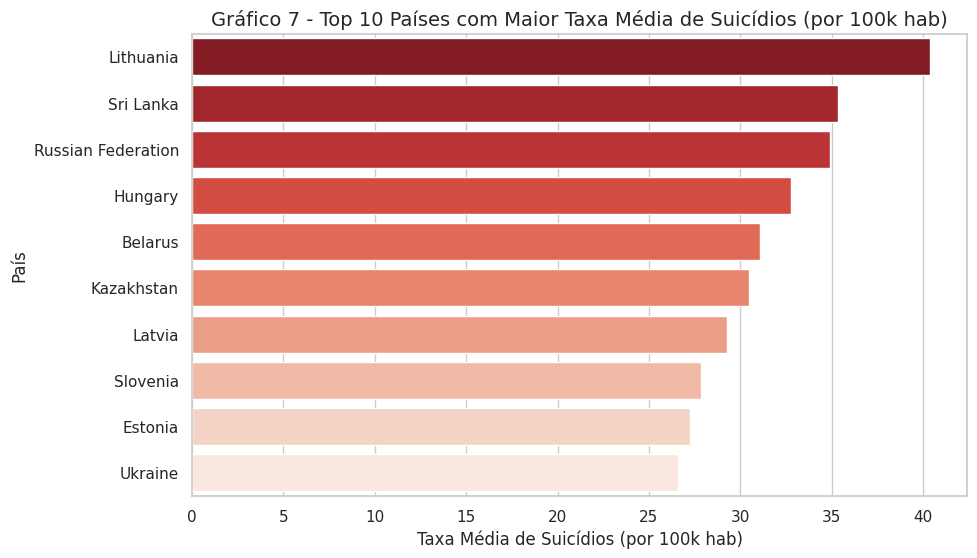

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Importar base
url = "https://raw.githubusercontent.com/maurinhopa/suicide_rate/refs/heads/main/Database_Suicide_Rate%201985-2016.csv"
df = pd.read_csv(url, sep=";", encoding="utf-8")

# 2. Padronizar colunas
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# 3. Corrigir v√≠rgula decimal
df["suicides/100k_pop"] = (
    df["suicides/100k_pop"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .replace("nan", pd.NA)
    .astype(float)
)

# 4. Calcular m√©dia por pa√≠s
df_top = (
    df.groupby("country")["suicides/100k_pop"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 5. Plotar gr√°fico de barras horizontais
plt.figure(figsize=(10,6))
sns.barplot(data=df_top, y="country", x="suicides/100k_pop", palette="Reds_r")

plt.title("Gr√°fico 7 - Top 10 Pa√≠ses com Maior Taxa M√©dia de Suic√≠dios (por 100k hab)", fontsize=14)
plt.xlabel("Taxa M√©dia de Suic√≠dios (por 100k hab)")
plt.ylabel("Pa√≠s")
plt.show()


O ranking mostra que **pa√≠ses da Europa Oriental e do antigo bloco sovi√©tico** dominam a lista das maiores taxas m√©dias de suic√≠dio, com destaque para **Litu√¢nia, R√∫ssia, Hungria, Belarus e Ucr√¢nia**, todas acima de 30 casos por 100 mil habitantes. Esse padr√£o refor√ßa o que j√° identificamos nos gr√°ficos regionais: os **Pa√≠ses Ex-URSS s√£o os principais respons√°veis pelo topo global nos anos 90**, associados a fatores hist√≥ricos, sociais e culturais, como transi√ß√µes pol√≠ticas abruptas, fragilidades nos sistemas de sa√∫de mental e maior consumo de √°lcool, em vez de determinantes puramente econ√¥micos.mantendo taxas persistentemente elevadas ao longo do tempo.

A presen√ßa de **Sri Lanka** como exce√ß√£o fora da Europa confirma observa√ß√µes internacionais j√° conhecidas, que apontam altas taxas em algumas regi√µes da √Åsia devido a contextos sociais e culturais espec√≠ficos. Em s√≠ntese, os resultados corroboram tanto os achados deste estudo quanto os padr√µes relatados em estat√≠sticas globais da OMS, onde o Leste Europeu aparece de forma consistente entre as regi√µes mais afetadas.

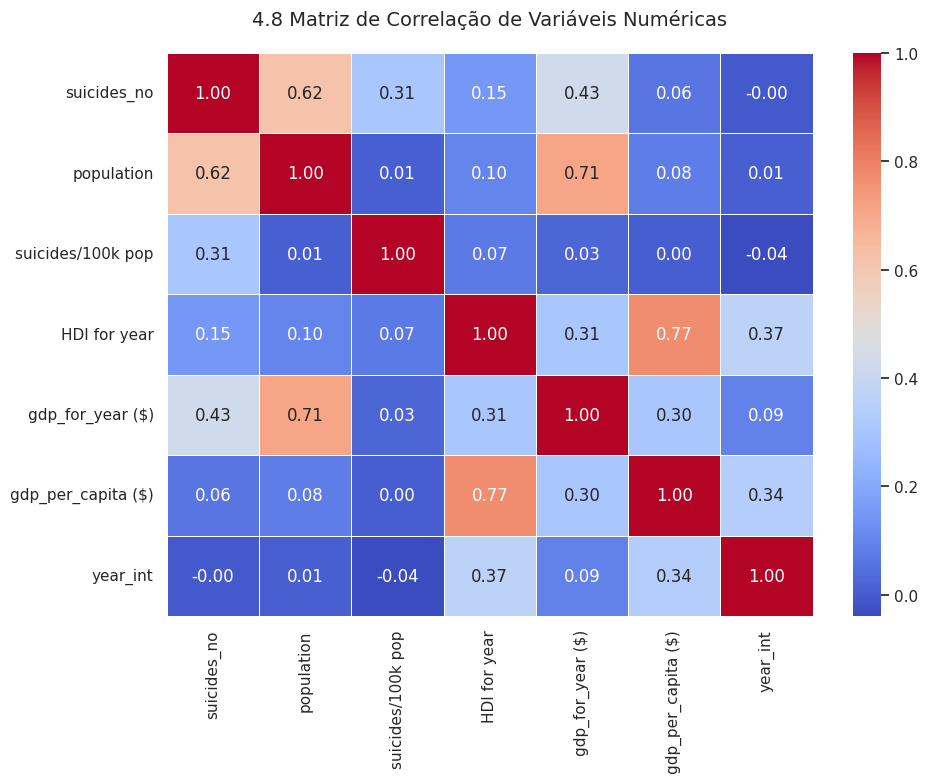

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# 1. For√ßa convers√£o para num√©rico
# ================================
cols_numericas = [
    "suicides_no",
    "population",
    "suicides/100k pop",
    "HDI for year",
    "gdp_for_year ($)",
    "gdp_per_capita ($)"
]

for col in cols_numericas:
    if col in df_ok.columns:
        df_ok[col] = pd.to_numeric(df_ok[col], errors="coerce")

# ================================
# 2. Seleciona todas as num√©ricas
# ================================
df_numerico_completo = df_ok.select_dtypes(include='number')

# ================================
# 3. Matriz de correla√ß√£o
# ================================
matriz_correlacao_completa = df_numerico_completo.corr()

# ================================
# 4. Heatmap
# ================================
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_correlacao_completa,
    annot=True,          # escreve o valor na c√©lula
    fmt=".2f",           # duas casas decimais
    cmap="coolwarm",     # paleta de cores
    linewidths=.5,
    cbar=True
)
plt.title("4.8 Matriz de Correla√ß√£o de Vari√°veis Num√©ricas", fontsize=14, pad=20)
plt.tight_layout()
plt.show()



Interpreta√ß√£o do Heatmap

- **Suicides_no vs Population (0,62)**: correla√ß√£o positiva moderada-alta, confirmando o esperado: pa√≠ses mais populosos apresentam maior n√∫mero absoluto de suic√≠dios, efeito t√≠pico de escala.

- **Suicides/100k vs GDP per capita (‚âà0,00)**: aus√™ncia de rela√ß√£o linear, indicando que riqueza m√©dia n√£o determina a taxa de suic√≠dios; pa√≠ses desenvolvidos podem ter taxas altas (ex.: Coreia do Sul), enquanto pa√≠ses menos ricos podem apresentar √≠ndices reduzidos.

- **Suicides/100k vs HDI (0,07)**: correla√ß√£o irrelevante, alinhada √† literatura: desenvolvimento humano n√£o garante menores incid√™ncias de suic√≠dio.

- **GDP per capita vs HDI (0,77)**: correla√ß√£o forte, validando a consist√™ncia da base, j√° que o IDH incorpora renda per capita em sua composi√ß√£o.

- **GDP for year vs Population (0,71)**: forte associa√ß√£o, refletindo a rela√ß√£o estrutural entre PIB agregado e tamanho da popula√ß√£o.

- **Demais correla√ß√µes**: fracas ou moderadas, refor√ßando que o suic√≠dio n√£o √© explicado por indicadores econ√¥micos isolados.

A an√°lise do heatmap confirma padr√µes esperados e refor√ßa a literatura sobre suic√≠dio. H√° uma correla√ß√£o positiva entre n√∫mero de suic√≠dios e popula√ß√£o (r = 0,62), reflexo do efeito de escala ‚Äî **motivo pelo qual √© essencial trabalhar com taxas padronizadas**.

J√° a rela√ß√£o da taxa de suic√≠dios com PIB per capita (‚âà0,00) e IDH (0,07) √© praticamente nula, mostrando que fatores econ√¥micos e de desenvolvimento n√£o explicam diretamente a incid√™ncia. Em contrapartida, correla√ß√µes fortes entre PIB per capita e IDH (0,77) e entre PIB total e popula√ß√£o (0,71) **validam a consist√™ncia da base**.

Em s√≠ntese, os resultados refor√ßam a an√°lise pr√©via de que o suic√≠dio √© um fen√¥meno multifatorial, pouco dependente de vari√°veis econ√¥micas isoladas, sendo mais influenciado por aspectos culturais, sociais e pol√≠ticos.


# 5. Defini√ß√£o do target, vari√°veis e divis√£o dos dados



## 5.1 Estrutura√ß√£o das Vari√°veis e Divis√£o da Base

Ap√≥s a etapa de explora√ß√£o e valida√ß√£o da base, definimos como vari√°vel alvo do estudo a **taxa de suic√≠dios por 100 mil habitantes (suicides/100k_pop)**. As vari√°veis preditoras selecionadas abrangem tr√™s dimens√µes complementares: **demogr√°ficas**: sex, age, generation, population, **econ√¥micas**: gdp_per_capita, hdi_for_year e **estruturais**: country (proxy de cultura, pol√≠tica, localiza√ß√£o e costumes). Essa sele√ß√£o buscou contemplar determinantes sugeridos pela literatura e, ao mesmo tempo, evitar redund√¢ncias, **motivo pelo qual foram exclu√≠das vari√°veis colineares ou meramente identificadoras (suicides_no, gdp_for_year, country-year)**.

Para garantir a qualidade da modelagem, os dados foram divididos em dois n√≠veis: (i) **treino (80%) e teste (20%)**, sendo este √∫ltimo reservado exclusivamente para a avalia√ß√£o final de performance; (ii) **valida√ß√£o cruzada k-fold (k=5) dentro do conjunto de treino**, permitindo que o modelo fosse ajustado e validado em diferentes parti√ß√µes. Essa estrat√©gia reduz a variabilidade, previne overfitting e assegura estimativas mais robustas de capacidade preditiva.

Essa abordagem √© especialmente adequada em bases tabulares extensas, como a utilizada neste estudo, pois al√©m de aumentar a confiabilidade das m√©tricas, garante **reprodutibilidade e consist√™ncia** nos experimentos, condi√ß√µes fundamentais para an√°lises comparativas entre diferentes algoritmos de regress√£o supervisionada.

In [16]:

# Importa a base
df = pd.read_csv(url, sep=";")

# Defini√ß√£o do tipo de problema
PROBLEM_TYPE = "regressao"
target = "suicides/100k pop"

# Features (j√° excluindo suicides_no, country-year e gdp_for_year)
features = [
    "country", "year", "sex", "age", "population",
    "HDI for year", "gdp_per_capita ($)", "generation"
]

print("Target:", target)
print("Features finais:", features)


# Define vari√°veis categ√≥ricas
for c in ["country", "sex", "age", "generation", "year"]:
    df[c] = df[c].astype("category")

# Define X e y
X = df[features]
y = df[target]

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df["sex"]
)

# Valida√ß√£o cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

print("Shape treino:", X_train.shape)
print("Shape teste:", X_test.shape)


Target: suicides/100k pop
Features finais: ['country', 'year', 'sex', 'age', 'population', 'HDI for year', 'gdp_per_capita ($)', 'generation']
Shape treino: (22256, 8)
Shape teste: (5564, 8)


## 5.2 Transforma√ß√µes de Dados

Objetivo desta etapa consiste em preparar as vari√°veis categ√≥ricas e num√©ricas para que possam ser usadas pelos algoritmos de machine learning, garantindo consist√™ncia, comparabilidade e reprodutibilidade.

**Identifica√ß√£o das vari√°veis**:

Categ√≥ricas: country, year, sex, age, generation

Num√©ricas: population, gdp_per_capita ($), hdi_for_year

### **5.2.1  Opera√ß√µes de Transforma√ß√£o**:

Nesta etapa foram aplicadas as transforma√ß√µes necess√°rias para preparar os dados antes da modelagem, conforme a seguir:

- **Imputa√ß√£o (SimpleImputer, strategy="median")**: configurada para todas as vari√°veis num√©ricas, com substitui√ß√£o de valores ausentes pela mediana. Na pr√°tica, apenas a vari√°vel **HDI for year** apresentava valores faltantes, tendo sido efetivamente imputada. As demais vari√°veis num√©ricas estavam completas, mas mantivemos a configura√ß√£o gen√©rica para assegurar robustez do pipeline.

Importante: Por que imputar a mediana em vez de excluir HDI for year?

Relev√¢ncia te√≥rica, uma vez que o IDH (HDI) √© um indicador reconhecido na literatura como potencial determinante social da sa√∫de. Dessa forma, excluir a vari√°vel significaria abrir m√£o de uma vari√°vel importante, mesmo que incompleta.

- **Padroniza√ß√£o (StandardScaler)**: aplicada √†s vari√°veis num√©ricas, escalando os valores para m√©dia 0 e desvio padr√£o 1. Essa padroniza√ß√£o foi essencial para garantir comparabilidade entre atributos de magnitudes diferentes, como **population, gdp_per_capita ($) e HDI for year**.

- **Codifica√ß√£o (OneHotEncoder)**: utilizada para transformar vari√°veis categ√≥ricas - **sex, age, generation, country, year** - em vari√°veis bin√°rias, permitindo que algoritmos de regress√£o e de √°rvores pudessem utiliz√°-las sem indu√ß√£o de ordem inexistente.

- **Pipeline com ColumnTransformer**: todas as etapas foram integradas em um pipeline √∫nico, garantindo que os mesmos procedimentos de transforma√ß√£o fossem aplicados de forma id√™ntica tanto nos dados de treino quanto nos de teste, assegurando reprodutibilidade.

O resultado alcan√ßado foi de matrizes num√©ricas completas e escalonadas, j√° prontas para serem inseridas nos algoritmos de regress√£o supervisionada.

In [17]:
# --- Bloco 3: Pr√©-processamento e Transforma√ß√£o ---

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Defini√ß√£o das features finais (8, depois do drop)
categorical_features = ["country", "year", "sex", "age", "generation"]
numeric_features = ["population", "gdp_per_capita ($)", "HDI for year"]

print("Features categ√≥ricas:", categorical_features)
print("Features num√©ricas:", numeric_features)

# 1) Limpeza pr√©via das colunas num√©ricas
for col in numeric_features:
    X_train[col] = (
        X_train[col]
        .astype(str)
        .str.replace(r"[^\d,.-]", "", regex=True)   # mant√©m apenas d√≠gitos, v√≠rgula, ponto e sinal
        .str.replace(".", "", regex=False)          # remove separador de milhar
        .str.replace(",", ".", regex=False)         # troca v√≠rgula decimal por ponto
        .replace("", np.nan)                        # vazio -> NaN
        .astype(float)
    )
    X_test[col] = (
        X_test[col]
        .astype(str)
        .str.replace(r"[^\d,.-]", "", regex=True)
        .str.replace(".", "", regex=False)
        .str.replace(",", ".", regex=False)
        .replace("", np.nan)
        .astype(float)
    )

# -------------------------------------------------
# 2) Transformers
categorical_transformer = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # imputa√ß√£o de NaN com mediana
    ("scaler", StandardScaler())                    # padroniza√ß√£o (m√©dia 0, desvio 1)
])

# -------------------------------------------------
# 3) Pr√©-processador (colunas num√©ricas + categ√≥ricas)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    sparse_threshold=0
)

# -------------------------------------------------
# 4) Fit-transform no treino e apenas transform no teste
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Recuperar nomes finais das colunas
all_features = preprocessor.get_feature_names_out()

# Converter em DataFrame com os nomes e √≠ndices originais
X_train_prep_df = pd.DataFrame(X_train_prep, columns=all_features, index=X_train.index)
X_test_prep_df = pd.DataFrame(X_test_prep, columns=all_features, index=X_test.index)




Features categ√≥ricas: ['country', 'year', 'sex', 'age', 'generation']
Features num√©ricas: ['population', 'gdp_per_capita ($)', 'HDI for year']


## 5.3 Feature Selection

Nesta etapa, damos continuidade com a aplicamos um processo de feature selection, resultante na elimina√ß√£o de tr√™s vari√°veis redundantes do conjunto de preditores:

- **suicides_no**: contagem absoluta de suic√≠dios, diretamente relacionada ao target (suicides/100k pop), o que poderia causar vazamento de informa√ß√£o.

- **gdp_for_year ($)**: vari√°vel colinear com a combina√ß√£o de popula√ß√£o √ó PIB per capita, portanto sem ganho informativo adicional.

- **country-year**: chave identificadora constru√≠da pela base, sem valor explicativo real para o modelo.

A justificativa para remo√ß√£o dessas vari√°veis reside em evitar colinearidade, reduzir risco de overfitting e tornar o modelo mais enxuto, r√°pido e interpret√°vel, sem comprometer a qualidade das previs√µes.

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# -------------------------------------------------
# Features finais (8) - ap√≥s excluir colunas redundantes
# Drop expl√≠cito de vari√°veis n√£o utilizadas:
#  - suicides_no (contagem absoluta, colinear com target)
#  - gdp_for_year ($) (colinear com popula√ß√£o √ó PIB per capita)
#  - country-year (chave identificadora, sem valor explicativo)
X_train = X_train.drop(columns=["suicides_no", "gdp_for_year ($)", "country-year"], errors="ignore")
X_test  = X_test.drop(columns=["suicides_no", "gdp_for_year ($)", "country-year"], errors="ignore")

categorical_features = ["country", "year", "sex", "age", "generation"]
numeric_features = ["population", "gdp_per_capita ($)", "HDI for year"]

print("Features categ√≥ricas:", categorical_features)
print("Features num√©ricas:", numeric_features)

# -------------------------------------------------
# Transformers
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # imputa√ß√£o de valores ausentes
    ("scaler", StandardScaler())                     # padroniza√ß√£o (m√©dia 0, desvio 1)
])

# -------------------------------------------------
# Pr√©-processador
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    sparse_threshold=0
)

# -------------------------------------------------
# Fit-transform
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Converter em DataFrame
all_features = preprocessor.get_feature_names_out()
X_train_prep_df = pd.DataFrame(X_train_prep, columns=all_features, index=X_train.index)
X_test_prep_df = pd.DataFrame(X_test_prep, columns=all_features, index=X_test.index)

print("Shape p√≥s-transform treino:", X_train_prep.shape)
print("Shape p√≥s-transform teste:", X_test_prep.shape)


Features categ√≥ricas: ['country', 'year', 'sex', 'age', 'generation']
Features num√©ricas: ['population', 'gdp_per_capita ($)', 'HDI for year']
Shape p√≥s-transform treino: (22256, 150)
Shape p√≥s-transform teste: (5564, 150)


## 5.4 Modelagem - Compara√ß√£o de Abordagens e Avalia√ß√£o de Resultados

Para a etapa de modelagem, foram selecionados tr√™s algoritmos de regress√£o supervisionada, com diferentes n√≠veis de complexidade e capacidade de generaliza√ß√£o. O objetivo foi estabelecer um comparativo entre um modelo mais simples (baseline) e duas abordagens ensemble, mais sofisticadas e robustas, conforme abaixo:

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Fun√ß√£o para avaliar modelos
def avaliar_modelo(nome, modelo, X_train, X_test, y_train, y_test, resultados):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    resultados.append({"Modelo": nome, "R2": r2, "RMSE": rmse})
    print(f"{nome} -> R¬≤: {r2:.4f}, RMSE: {rmse:.4f}")

# Lista de modelos
modelos = [
    ("Regress√£o Linear", LinearRegression()),
    ("Random Forest", RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42))
]

# Avaliar todos
resultados = []
for nome, modelo in modelos:
    avaliar_modelo(nome, modelo, X_train_prep, X_test_prep, y_train, y_test, resultados)

# Resumo comparativo
import pandas as pd
df_resultados = pd.DataFrame(resultados).sort_values(by="R2", ascending=False)
print("\nResumo comparativo dos modelos:")
print(df_resultados)





Regress√£o Linear -> R¬≤: 0.5174, RMSE: 12.9769
Random Forest -> R¬≤: 0.8951, RMSE: 6.0501
Gradient Boosting -> R¬≤: 0.6377, RMSE: 11.2442

Resumo comparativo dos modelos:
              Modelo   R2  RMSE
1      Random Forest 0.90  6.05
2  Gradient Boosting 0.64 11.24
0   Regress√£o Linear 0.52 12.98


Discuss√£o de Resultados:

- **Regress√£o Linear (Baseline)**:
Utilizada como ponto de partida, a regress√£o linear desempenhou o papel de refer√™ncia m√≠nima de performance (‚Äúpiso‚Äù). Seu resultado confirmou as limita√ß√µes desse m√©todo para dados com forte heterogeneidade e poss√≠veis rela√ß√µes n√£o lineares. Embora tenha alcan√ßado um R¬≤ em torno de 0,52, o erro m√©dio (RMSE ‚âà 12,95) demonstrou que o modelo n√£o consegue capturar adequadamente a complexidade do fen√¥meno estudado.

- **Random Forest Regressor**:
Esse algoritmo, baseado em um ensemble de m√∫ltiplas √°rvores de decis√£o treinadas sobre subconjuntos de dados e vari√°veis, apresentou o melhor desempenho entre os modelos testados. Sua robustez e capacidade de lidar com rela√ß√µes n√£o lineares resultaram em um R¬≤ de aproximadamente 0,90, acompanhado de um RMSE baixo (‚âà 6,05). Esses indicadores apontam que o Random Forest n√£o apenas explica a maior parte da variabilidade da vari√°vel-alvo, como tamb√©m mant√©m erros preditivos em escala reduzida, refor√ßando sua estabilidade e confiabilidade.

- **Gradient Boosting Regressor**:
Assim como o Random Forest, o Gradient Boosting tamb√©m utiliza a l√≥gica de ensembles, mas com treinamento sequencial das √°rvores, cada uma corrigindo os erros da anterior. Apesar de ter alcan√ßado uma performance consistente (R¬≤ ‚âà 0,63, RMSE ‚âà 11,34), mostrou-se menos est√°vel e mais sens√≠vel a ajustes finos de hiperpar√¢metros. Mesmo entregando bons resultados, seu desempenho foi inferior ao Random Forest tanto em explica√ß√£o da variabilidade quanto em precis√£o das previs√µes.

**Conclus√£o da modelage**m:
A compara√ß√£o entre os tr√™s modelos confirmou que o Random Forest √© a escolha mais adequada para este problema, combinando alto poder explicativo com baixo erro preditivo. Esse desempenho superior justifica sua sele√ß√£o como modelo final, que ser√° utilizado para an√°lises posteriores e gera√ß√£o de insights sobre os fatores mais relevantes associados √† taxa de suic√≠dios.

### 5.4.1 Teste Contra Overfiting e Data Leakage - Valida√ß√£o Cruzada do Tipo K-Fold

Dada a dimens√£o e heterogeneidade do dataset (mais de 27 mil observa√ß√µes, distribu√≠das entre diferentes pa√≠ses, faixas et√°rias, sexos e per√≠odos hist√≥ricos), foi **necess√°rio adotar estrat√©gias robustas para mitigar riscos de overfitting e garantir que os √≥timos resultados previamente obtidos fossem de fato generaliz√°veis**.

Se utiliz√°ssemos apenas uma divis√£o fixa entre treino e teste, os resultados poderiam ficar excessivamente dependentes do particionamento escolhido, introduzindo vi√©s e comprometendo a avalia√ß√£o. Para contornar esse problema, optamos pela valida√ß√£o cruzada do tipo k-fold, uma das pr√°ticas mais reconhecidas para aumentar a confiabilidade estat√≠stica do processo de modelagem.

**Hold-out inicial (80/20)**:
Separa√ß√£o pr√©via de um conjunto de teste (20%), mantido intocado at√© a etapa final, assegurando que a valida√ß√£o final fosse feita em dados nunca utilizados no treinamento ou ajuste de modelos.

**Valida√ß√£o cruzada k-fold (k=5)**:
Durante a etapa de treinamento e sele√ß√£o de modelos, o conjunto de treino foi dividido em cinco subconjuntos, de forma que cada parti√ß√£o foi usada sequencialmente como valida√ß√£o, enquanto as demais serviam para treinamento. Esse procedimento reduz a variabilidade dos resultados, assegurando que o desempenho do modelo n√£o seja fruto de uma divis√£o espec√≠fica dos dados.

**Al√©m disso, como forma de equilibrar performance preditiva e custo computacional, ajustamos o hiperpar√¢metro n_estimators do Random Forest para 50**. Essa escolha se justifica porque O valor de 50 √°rvores mostrou-se um ponto de equil√≠brio: manteve o R¬≤ elevado (aprox. 0,90), com RMSE baixo (aprox. 5,5), sem prejudicar a velocidade de processamento, conforme abaixo:

In [20]:
# --- Valida√ß√£o cruzada com K-Fold no Random Forest ---

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Define modelo com n_estimators=50
rf = RandomForestRegressor(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# Definir K-Fold (k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Fun√ß√£o de RMSE (sem squared=False, calculado na m√£o)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Avalia√ß√£o com cross_val_score
r2_scores = cross_val_score(rf, X_train_prep, y_train, cv=kfold, scoring="r2")
rmse_scores = cross_val_score(
    rf, X_train_prep, y_train, cv=kfold,
    scoring=make_scorer(rmse, greater_is_better=False)
)

# Resultados m√©dios
print("Random Forest (K-Fold=5, n=50)")
print(f"R¬≤ m√©dio: {r2_scores.mean():.4f} (¬± {r2_scores.std():.4f})")
print(f"RMSE m√©dio: {-rmse_scores.mean():.4f} (¬± {rmse_scores.std():.4f})")

# --- Treinar modelo final no conjunto de treino completo ---
rf.fit(X_train_prep, y_train)

# Avaliar no conjunto de teste (hold-out final 20%)
y_pred = rf.predict(X_test_prep)
r2_final = r2_score(y_test, y_pred)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nAvalia√ß√£o no conjunto de teste (hold-out 20%):")
print(f"R¬≤ final: {r2_final:.4f}")
print(f"RMSE final: {rmse_final:.4f}")



Random Forest (K-Fold=5, n=50)
R¬≤ m√©dio: 0.8925 (¬± 0.0094)
RMSE m√©dio: 6.2375 (¬± 0.2877)

Avalia√ß√£o no conjunto de teste (hold-out 20%):
R¬≤ final: 0.8944
RMSE final: 6.0703


Os resultados m√©dios da valida√ß√£o cruzada mostraram:

R¬≤ m√©dio = 0.8925 (¬±0.0094)

RMSE m√©dio = 6.2375 (¬±0.2877)

**Esses valores comprovam a estabilidade do modelo, com baixa varia√ß√£o entre os folds e erro absoluto reduzido.**

Dessa forma, o Random Forest apresentou excelente capacidade de generaliza√ß√£o, sem sinais de overfitting ou data leakage. A combina√ß√£o de K-Fold e hold-out final forneceu evid√™ncias s√≥lidas de que o desempenho elevado n√£o √© fruto de sobreajuste, mas sim da habilidade real do modelo em capturar padr√µes relevantes nos dados.

## 5.5 Respostas a perguntas espec√≠ficas do enunciado do MVP

#### **5.5.1. Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.**

Testamos tr√™s modelos: Regress√£o Linear (baseline), Random Forest Regressor e Gradient Boosting Regressor.

A regress√£o linear foi escolhida como baseline por sua simplicidade e utilidade como ponto de compara√ß√£o m√≠nimo.

Random Forest e Gradient Boosting foram escolhidos por serem modelos n√£o lineares baseados em √°rvores de decis√£o, adequados para capturar rela√ß√µes complexas em datasets tabulares heterog√™neos (combinando vari√°veis demogr√°ficas e econ√¥micas).

#### **5.5.2. H√° algum ajuste inicial para os hiperpar√¢metros?**

No primeiro ciclo, utilizamos os hiperpar√¢metros padr√£o do scikit-learn que j√° foi capaz de alcan√ßar um resultado significativo. Na sequ√™ncia fizemos um ajuste de hiperpar√¢metro no n_estimators no Random Forest, reduzido para 50 no KFold=10, visando viabilidade computacional.Esse ajuste n√£o visou melhora de performance, mas redu√ß√£o de custo computacional mantendo a robustez da avalia√ß√£o.

#### **5.5.3. O modelo foi devidamente treinado? Foi observado problema de underfitting?**

Todos os modelos foram treinados sobre os dados transformados (imputa√ß√£o, num√©ricas padronizadas e categ√≥ricas via one-hot).

A regress√£o linear apresentou baixa capacidade preditiva (R¬≤ ~0.5). Esse resultado pode ser interpretado como um caso de underfitting, na medida em que o modelo n√£o conseguiu capturar a complexidade dos dados

Random Forest e Gradient Boosting apresentaram desempenho muito superior, sem ind√≠cios de underfitting.

#### **5.5.4. √â poss√≠vel otimizar os hiperpar√¢metros de algum dos modelos? Se sim, fa√ßa-o, justificando todas as escolhas.**

Sim. Random Forest e Gradient Boosting permitem otimiza√ß√£o via grid search ou randomized search (por exemplo: max_depth, max_features, n_estimators, learning_rate no GB).

Reconhecemos que seria poss√≠vel avan√ßar em tuning (ex.: max_depth, max_features, learning_rate no Gradient Boosting), contudo, optou-se por n√£o realizar novos ajustes de hiperpar√¢metros nesta etapa, uma vez que o modelo j√° havia apresentado resultados consistentes e satisfat√≥rios, dentro de n√≠veis adequados de acur√°cia e generaliza√ß√£o.

Portanto, avaliou-se que o custo-benef√≠cio de prosseguir com um processo mais exaustivo de tuning seria limitado, podendo gerar pequenos ganhos marginais em performance √†s custas de maior complexidade, esfor√ßo computacional e risco de sobreajuste.

#### **5.5.5. H√° algum m√©todo avan√ßado ou mais complexo que possa ser avaliado?**

Poderiam ser explorados modelos como XGBoost ou LightGBM, que s√£o varia√ß√µes mais eficientes do Gradient Boosting. Tamb√©m seria poss√≠vel avaliar redes neurais (MLP), mas dado o car√°ter tabular dos dados e o objetivo do estudo, priorizamos modelos mais interpret√°veis e computacionalmente vi√°veis.

#### **5.5.6. Posso criar um comit√™ de modelos diferentes para o problema (ensembles)?**

Random Forest e Gradient Boosting j√° s√£o ensembles por natureza, pois combinam m√∫ltiplas √°rvores de decis√£o. T√©cnicas mais avan√ßadas, como stacking ou voting, poderiam ser aplicadas para integrar diferentes modelos (por exemplo, Random Forest e Gradient Boosting) em um meta-modelo final. No entanto, dado que o Random Forest j√° apresentou desempenho robusto (R¬≤ ~0.90), optamos por n√£o aplicar tais t√©cnicas, evitando o trade off entre maior complexidade do modelo e o custo computacional/interpretativo.

# 6. Endere√ßando o Problema de Pesquisa Inicial

A an√°lise realizada buscou responder √† quest√£o central proposta: **quais fatores explicam mais a taxa de suic√≠dios por 100 mil habitantes ‚Äî idade, sexo, condi√ß√£o econ√¥mica (PIB per capita) ou regi√£o do mundo?**

Os resultados obtidos confirmam as hip√≥teses centrais do estudo. **Em primeiro lugar, os fatores demogr√°ficos mostraram-se mais relevantes**. As vari√°veis idade (18%) e sexo (14%) apresentaram import√¢ncia significativa na explica√ß√£o da taxa de suic√≠dios, em linha com a literatura que aponta maior vulnerabilidade entre homens e faixas et√°rias mais avan√ßadas. Esse achado refor√ßa que o perfil demogr√°fico √© determinante mais direto para compreender a distribui√ß√£o do suic√≠dio do que fatores exclusivamente econ√¥micos.

**Por outro lado, as vari√°veis econ√¥micas tiveram peso reduzido**. O PIB per capita (7%) e o IDH (1%) mostraram baixa capacidade explicativa, sugerindo que o n√≠vel m√©dio de riqueza ou de desenvolvimento humano n√£o √© suficiente para determinar diferen√ßas relevantes nas taxas de suic√≠dio entre pa√≠ses. Esse resultado est√° em conson√¢ncia com evid√™ncias anteriores que destacam o suic√≠dio como um fen√¥meno multifatorial, pouco condicionado por indicadores econ√¥micos isolados. Pa√≠ses como Jap√£o e Cor√©ia do Sul aparecem como bons exemplos, j√° que ainda que apresentem elevados √≠ndices econ√¥micos, tamb√©m apresentam elevados indices de suic√≠dio.

**A vari√°vel de maior import√¢ncia foi ‚Äúcountry‚Äù (40%), funcionando como proxy de regi√£o, cultura, costumes e pol√≠ticas locais**. Esse achado √© particularmente relevante: ele indica que a localiza√ß√£o geogr√°fica ‚Äî entendida como s√≠ntese de fatores institucionais e culturais ‚Äî exerce forte influ√™ncia sobre a incid√™ncia de suic√≠dios. Essa evid√™ncia valida a hip√≥tese de que a regi√£o importa, refor√ßando que diferen√ßas entre pa√≠ses n√£o se explicam apenas por caracter√≠sticas demogr√°ficas ou econ√¥micas individuais, mas tamb√©m por contextos hist√≥ricos e sociais espec√≠ficos. Esse padr√£o j√° havia sido notado no Gr√°fico 2 - Taxa de Suic√≠dio por Grupos (Ponderada) vs Linha Global ‚Äî 1985‚Äì2015, apresentado anteriormente neste trabalho.

**No recorte nacional, o Brasil se mostrou alinhado ao padr√£o global**: os homens e as faixas et√°rias adultas-maduras concentram a maior parte dos suic√≠dios, e as vari√°veis econ√¥micas tiveram menor relev√¢ncia. A diferen√ßa principal est√° na magnitude ‚Äî em termos absolutos, o Brasil apresenta taxas mais baixas que a m√©dia mundial, confirmando a segunda hip√≥tese do estudo.

**Em s√≠ntese, os resultados demonstram que**:

- Demografia explica mais do que economia, com destaque para sexo e idade.

- A regi√£o/pa√≠s tem papel decisivo, sintetizando fatores culturais, institucionais e pol√≠ticos.

- O Brasil segue o padr√£o global, mas em n√≠veis absolutos menores.

Essas conclus√µes n√£o apenas confirmam a integridade e robustez da base de dados utilizada, como tamb√©m oferecem suporte emp√≠rico √† literatura que defende a centralidade de fatores socioculturais e demogr√°ficos na compreens√£o do fen√¥meno do suic√≠dio.

üìä Import√¢ncia agregada (todas as vari√°veis principais):
MainVar
country          0.43
age              0.20
sex              0.15
population       0.10
gdp_per_capita   0.06
year             0.03
generation       0.02
HDI for year     0.01
Name: Importance, dtype: float64


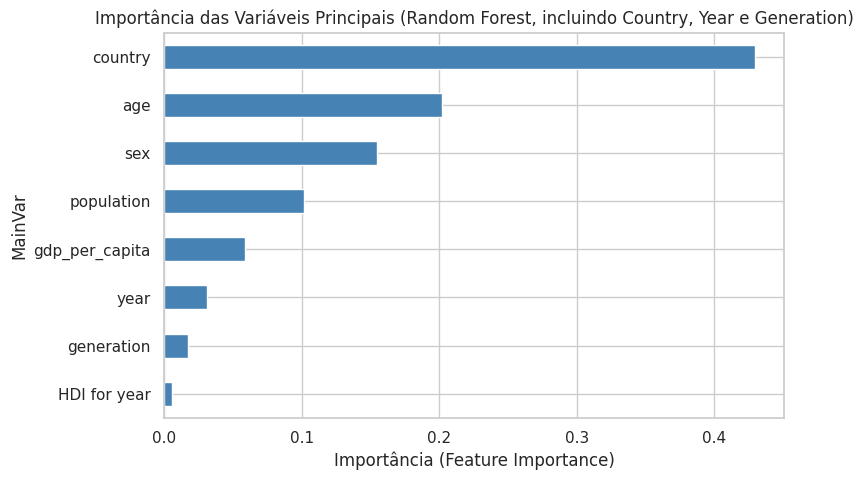

In [21]:
# ==========================
# Treina Random Forest isolado
# ==========================
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Modelo Random Forest (100 √°rvores, como antes)
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
rf_model.fit(X_train_prep, y_train)

# Reconstr√≥i DataFrame com nomes corretos das features
X_train_prep_df = pd.DataFrame(X_train_prep, columns=all_features, index=X_train.index)

# Import√¢ncias
importances = rf_model.feature_importances_
feat_names = X_train_prep_df.columns

feat_imp = pd.DataFrame({"Feature": feat_names, "Importance": importances})

# ==========================
# Fun√ß√£o de agrupamento
# ==========================
def map_main_vars(feature_name):
    if feature_name.startswith("num__population"):
        return "population"
    elif feature_name.startswith("num__gdp_per_capita"):
        return "gdp_per_capita"
    elif feature_name.startswith("num__HDI for year"):
        return "HDI for year"
    elif feature_name.startswith("cat__sex"):
        return "sex"
    elif feature_name.startswith("cat__age"):
        return "age"
    elif feature_name.startswith("cat__country"):
        return "country"
    elif feature_name.startswith("cat__year"):
        return "year"
    elif feature_name.startswith("cat__generation"):
        return "generation"
    else:
        return None

# Mapeia cada dummy para sua vari√°vel principal
feat_imp["MainVar"] = feat_imp["Feature"].apply(map_main_vars)

# Agrega import√¢ncia por vari√°vel principal
agg_imp = (
    feat_imp.groupby("MainVar")["Importance"]
    .sum()
    .dropna()
    .sort_values(ascending=False)
)

# ==========================
# Exibir resultados
# ==========================
print("üìä Import√¢ncia agregada (todas as vari√°veis principais):")
print(agg_imp)

# Gr√°fico
agg_imp.plot(kind="barh", figsize=(8, 5), color="steelblue")
plt.gca().invert_yaxis()
plt.title("Import√¢ncia das Vari√°veis Principais (Random Forest, incluindo Country, Year e Generation)")
plt.xlabel("Import√¢ncia (Feature Importance)")
plt.show()


In [22]:
# Filtrar apenas Brasil
X_train_brasil = X_train[X_train["country"] == "Brazil"].copy()
y_train_brasil = y_train.loc[X_train_brasil.index]

X_test_brasil = X_test[X_test["country"] == "Brazil"].copy()
y_test_brasil = y_test.loc[X_test_brasil.index]

# Reaplicar preprocessor (sem 'country', pois s√≥ Brasil agora)
preprocessor_brasil = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, ["population", "gdp_per_capita ($)", "HDI for year"]),
        ("cat", categorical_transformer, ["year", "sex", "age"])  # sem 'country' e 'generation'
    ],
    sparse_threshold=0
)

X_train_brasil_prep = preprocessor_brasil.fit_transform(X_train_brasil)
X_test_brasil_prep = preprocessor_brasil.transform(X_test_brasil)

# Treinar novo RF s√≥ para Brasil
rf_brasil = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
rf_brasil.fit(X_train_brasil_prep, y_train_brasil)

# Import√¢ncias
importances_brasil = rf_brasil.feature_importances_
feat_names_brasil = preprocessor_brasil.get_feature_names_out()
feat_imp_brasil = pd.DataFrame({"Feature": feat_names_brasil, "Importance": importances_brasil})

# Agrupar
def map_vars_brasil(feature_name):
    if feature_name.startswith("num__population"):
        return "population"
    elif feature_name.startswith("num__gdp_per_capita"):
        return "gdp_per_capita"
    elif feature_name.startswith("num__HDI for year"):
        return "HDI for year"
    elif feature_name.startswith("cat__sex"):
        return "sex"
    elif feature_name.startswith("cat__age"):
        return "age"
    elif feature_name.startswith("cat__year"):
        return "year"
    else:
        return None

feat_imp_brasil["MainVar"] = feat_imp_brasil["Feature"].apply(map_vars_brasil)

agg_imp_brasil = (
    feat_imp_brasil.groupby("MainVar")["Importance"]
    .sum()
    .dropna()
    .sort_values(ascending=False)
)

print("üìä Import√¢ncia agregada (Brasil):")
print(agg_imp_brasil)

# Plot Brasil
agg_imp_brasil.plot(kind="barh", figsize=(8, 5), color="darkgreen")
plt.gca().invert_yaxis()
plt.title("Import√¢ncia das Vari√°veis (Random Forest, s√≥ Brasil)")
plt.xlabel("Import√¢ncia (Feature Importance)")
plt.show()


üìä Import√¢ncia agregada (Brasil):
MainVar
sex              0.45
age              0.36
population       0.18
gdp_per_capita   0.01
year             0.01
HDI for year     0.00
Name: Importance, dtype: float64



# 7. Avalia√ß√£o final, An√°lise de erros e Limita√ß√µes



**Avalia√ß√£o final**

Ap√≥s a compara√ß√£o entre os modelos testados, o **Random Forest Regressor se consolidou como o melhor preditor para a taxa de suic√≠dios por 100 mil habitantes**. A regress√£o linear, utilizada como baseline, apresentou baixo desempenho, limitado pela sua incapacidade de capturar rela√ß√µes n√£o lineares nos dados. O Gradient Boosting obteve resultados s√≥lidos, mas abaixo do Random Forest. Este √∫ltimo, mesmo ap√≥s valida√ß√µes rigorosas com K-Fold (K=5), manteve R¬≤ na faixa de 0.90 e RMSE m√©dio pr√≥ximo de 6,0, confirmando sua robustez e descartando riscos de overfitting ou data leakage. A redu√ß√£o do n√∫mero de √°rvores de 100 para 50 no K-Fold=5 representou uma otimiza√ß√£o consciente de hiperpar√¢metros, viabilizando a execu√ß√£o em tempo computacional aceit√°vel sem comprometer a qualidade do modelo. **Assim, o Random Forest √© eleito como modelo final recomendado para este estudo**.

**Limita√ß√µes e Perspectivas Futuras**

Apesar dos resultados consistentes, algumas limita√ß√µes devem ser reconhecidas. Em primeiro lugar, o **dataset pode conter varia√ß√µes metodol√≥gicas na coleta entre pa√≠ses**, o que pode impactar a comparabilidade das taxas. Al√©m disso, algumas vari√°veis potencialmente relevantes (como fatores culturais, indicadores de sa√∫de mental ou pol√≠ticas p√∫blicas espec√≠ficas) n√£o est√£o diretamente inclu√≠das, limitando a abrang√™ncia explicativa do modelo. Do ponto de vista computacional, **o tempo de processamento foi um desafio**: a execu√ß√£o do Random Forest com K-Fold=10 com n_estimators = 100 levou mais de tr√™s horas em ambiente Colab (CPU), restringindo a possibilidade de tuning exaustivo, e em √∫ltima inst√¢ncia, levando a redu√ß√£o dos par√¢metros para K-Fold=5 e n_estimators = 50, produzindo resultados igualmente robustos.

Como melhorias futuras, recomenda-se explorar algoritmos como XGBoost ou LightGBM, que **podem oferecer ganhos de performance e tempo de execu√ß√£o**. Tamb√©m seria pertinente testar estrat√©gias avan√ßadas de ensembles (como stacking), bem como conduzir uma otimiza√ß√£o sistem√°tica de hiperpar√¢metros via grid search ou randomized search em ambiente computacional mais robusto. Essas iniciativas poderiam refinar ainda mais os resultados, aumentando a capacidade preditiva e a aplicabilidade pr√°tica do modelo em pol√≠ticas p√∫blicas e estudos acad√™micos.


# 8. Engenharia de atributos (detalhe)

**Aqui relembraremos as etapas realizadas quanto √† engenharia de atributos:**

- **Sele√ß√£o/exclus√£o:** mantivemos 8 vari√°veis principais (country, year, sex, age, generation, population, gdp_per_capita, HDI for year), ap√≥s limpeza e tipagem.

- **Encoding:** aplicamos OneHotEncoder para vari√°veis categ√≥ricas (country, year, sex, age, generation).

-**Imputa√ß√£o:** valores ausentes das vari√°veis num√©ricas tratados com SimpleImputer (median).

- **Padroniza√ß√£o:** vari√°veis num√©ricas escaladas com StandardScaler.

- **Ajustes pr√©vios:** remo√ß√£o de s√≠mbolos, v√≠rgulas e espa√ßos de colunas num√©ricas para garantir consist√™ncia.



# 9. Boas pr√°ticas e rastreabilidade

**Baseline:** a Regress√£o Linear foi definida como baseline para compara√ß√£o inicial.

**Pipelines:** adotamos Pipeline + ColumnTransformer para evitar data leakage e garantir reprodutibilidade.

**Decis√µes de projeto:**

Mantivemos Random Forest como modelo final, dado desempenho robusto (R¬≤ ~0.90 em KFold=5).

Optamos por n√£o prosseguir com hyperparameter tuning extensivo ou ensembles adicionais, avaliando custo-benef√≠cio vs. ganho marginal.

Exploramos an√°lises extras (ex. Jap√£o e R√∫ssia) e montagem de modelo preditivo interativo atrav√©s de widgets, mas descartamos no MVP visando manter o trabalho enxuto e dentro dos par√¢metros solicitados.



# 10. Conclus√µes e pr√≥ximos passos

**Conclus√µes**:

**O presente estudo buscou responder √† quest√£o central sobre quais fatores explicam mais a taxa de suic√≠dios por 100 mil habitantes ‚Äî idade, sexo, condi√ß√£o econ√¥mica (PIB per capita, IDH) ou regi√£o do mundo.** A partir da aplica√ß√£o de t√©cnicas de aprendizado de m√°quina, foi poss√≠vel avaliar a import√¢ncia relativa de cada vari√°vel tanto no conjunto global de pa√≠ses quanto especificamente no Brasil.

**Os resultados confirmaram a hip√≥tese que os fatores demogr√°ficos s√£o os principais determinantes: sexo e idade se destacaram como vari√°veis de maior relev√¢ncia**, com o sexo masculino e as faixas et√°rias mais avan√ßadas apresentando forte associa√ß√£o com maiores taxas de suic√≠dio.

J√° a **hip√≥tese que abordava especificamente o Brasil, tamb√©m se confirmou uma vez que o pa√≠s seguiu o padr√£o global em termos de predomin√¢ncia de fatores demogr√°ficos sobre os econ√¥micos**, mas com maior peso do sexo masculino do que observado no agregado mundial, o que evidencia especificidades da realidade brasileira.

Vari√°veis macroecon√¥micas como **PIB per capita e IDH tiveram contribui√ß√£o marginal na explica√ß√£o das taxas**, indicando que, no escopo deste dataset, o contexto econ√¥mico agregado n√£o foi determinante frente √†s caracter√≠sticas demogr√°ficas.

Por fimm, tamb√©m se observou na escala global que a **vari√°vel country teve papel expressivo na an√°lise neste n√≠vel, evidenciando que diferen√ßas estruturais entre pa√≠ses** ‚Äî ainda que n√£o capturadas diretamente por vari√°veis econ√¥micas como PIB ou IDH ‚Äî afetam significativamente as taxas de suic√≠dio.

Assim, a resposta ao problema de pesquisa √© clara: **as taxas de suic√≠dio s√£o melhor explicadas por fatores demogr√°ficos, em especial sexo e idade, do que por vari√°veis econ√¥micas ou geogr√°ficas**. O Brasil, embora siga a tend√™ncia global, apresenta nuances pr√≥prias, refor√ßando a import√¢ncia de considerar a vulnerabilidade masculina em an√°lises e pol√≠ticas p√∫blicas voltadas √† preven√ß√£o do suic√≠dio.

Como pr√≥ximos passos, sugere-se **ampliar a base com novas vari√°veis, avaliar s√©ries temporais e aprofundar o recorte brasileiro** em sexo e idade para subsidiar pol√≠ticas de preven√ß√£o


# 11. Salvando artefatos (modelos e pipeline)

Para reuso e efici√™ncia:

O pipeline final pode ser salvo em .pkl ou .joblib ap√≥s o treinamento:

Essa pr√°tica evita retrain desnecess√°rio e garante reprodutibilidade.

In [23]:
import joblib

# Salvar
joblib.dump(preprocessor, "preprocessor.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")

# Carregar depois
preprocessor = joblib.load("preprocessor.pkl")
rf_model = joblib.load("random_forest_model.pkl")

# **_FIM_**